In [1]:
pip install pandas scikit-learn matplotlib                                                    

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # Corrected import statement
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('happiness_score_dataset.csv')

df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
#Cheking first 5 rows of the dataset
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
#Cheking last 5 rows of the dataset
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


# Exploratory Data Analysis (EDA)

In [6]:
#Cheking columns
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
print("The shape of dataset is :",df.shape)

The shape of dataset is : (158, 12)


In [8]:
df = df.drop_duplicates()
print(f"Rows & Columns after deleting the duiplicates :",df.shape)

Rows & Columns after deleting the duiplicates : (158, 12)


With the drop_duplicates option I'm getting rid of all the duplicate values present in our dataset,
It seams to we have zero duplicate values.

In [9]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Using the df.info() method we can see that there is 2 column with object data type, 1 column with int datatype, 9 columns witn float data type
Also we have no missing value present in our dataset.

In [11]:
#This is our target variable / target features.

df["Dystopia Residual"].value_counts()

Dystopia Residual
2.51738    1
2.51767    1
1.80101    1
1.57059    1
1.24074    1
          ..
2.24729    1
1.61583    1
2.44649    1
2.32407    1
1.56726    1
Name: count, Length: 158, dtype: int64

In [12]:
df["Country"].value_counts()

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64

# Performing operation on colums we use x=1 & #Performing operation on rows we use x=0  

In [13]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [14]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)


Object Data Type Columns are:
 ['Country', 'Region']

Number Data Type Columns are: 
 ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


Object Data Type Columns are: ['Country', 'Region'] that means there is two a Categorical data so it's confirm with code also.
Rest of 10 columns have the Numerical data which are  ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'].

In [15]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

With this code we will find any missing value or not.
We have no null values present in the dataset that means we can proceed further.

In [16]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Using the describe method to check the numerical data details. There is 10 numerical columns in them & it look like the count, mean, standard deviation,minimum value, 25%,50%,75% quartile & maximum value are all properly distributed in tearms of data points showing no abnormality as such  

In [17]:
df.describe(include="all").T  #Discribe function will give all type of values


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,158,158,Switzerland,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,158,10,Sub-Saharan Africa,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Rank,158.0,NaN,NaN,NaN,79.493671,45.754363,1.0,40.25,79.5,118.75,158.0
Happiness Score,158.0,NaN,NaN,NaN,5.375734,1.14501,2.839,4.526,5.2325,6.24375,7.587
Standard Error,158.0,NaN,NaN,NaN,0.047885,0.017146,0.01848,0.037268,0.04394,0.0523,0.13693
Economy (GDP per Capita),158.0,NaN,NaN,NaN,0.846137,0.403121,0.0,0.545808,0.910245,1.158448,1.69042
Family,158.0,NaN,NaN,NaN,0.991046,0.272369,0.0,0.856823,1.02951,1.214405,1.40223
Health (Life Expectancy),158.0,NaN,NaN,NaN,0.630259,0.247078,0.0,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,NaN,NaN,NaN,0.428615,0.150693,0.0,0.32833,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,NaN,NaN,NaN,0.143422,0.120034,0.0,0.061675,0.10722,0.180255,0.55191


Heare I'm using describe methode along with it's parameter  all to include all the columns present in our dataset.
I have also used transpose option to make shure that we are able to see the column information properly without having to scroll through multiple data.

In [18]:
df.nunique().to_frame("Unique Values")

,Unique Values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


With the usage of nunique methode we can see the total number of unique values present in all the columns.

Exploring unique values in each numerical columns.

In [19]:
#Exploring unique values in each categorical coloumn
for col in numerical_cols:
    print(df[col].value_counts())
    print("="*50)

Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64
Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64
Standard Error
0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: count, Length: 153, dtype: int64
Economy (GDP per Capita)
1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: count, Length: 158, dtype: int64
Family
1.34951    1
0.43106    1
0.92933    1
0.80001    1
1.20215    1
          ..
1.12241    1
1.27385    1
1.25745    1
1.14184    1
0.13995    1
Name: count, Length: 158, dtype: int64
Health (Life Expectancy)
0.92356    2
0.94143    1
0.60268    1
0.88213    1
0

In [20]:
# Exploring summary statistics for numerical columns because we have all numerical columns.
for col in numerical_cols:
    print(col)
    print("Mean:", df[col].mean())
    print("Standard Deviation:", df[col].std())
    print("Minimum:", df[col].min())
    print("25th Percentile:", df[col].quantile(0.25))
    print("Median:", df[col].median())
    print("75th Percentile:", df[col].quantile(0.75))
    print("Maximum:", df[col].max())
    print("="*50)


Happiness Rank
Mean: 79.49367088607595
Standard Deviation: 45.75436310480852
Minimum: 1
25th Percentile: 40.25
Median: 79.5
75th Percentile: 118.75
Maximum: 158
Happiness Score
Mean: 5.375734177215189
Standard Deviation: 1.1450101349520665
Minimum: 2.839
25th Percentile: 4.526
Median: 5.2325
75th Percentile: 6.24375
Maximum: 7.587
Standard Error
Mean: 0.04788474683544304
Standard Deviation: 0.017146178556969302
Minimum: 0.01848
25th Percentile: 0.0372675
Median: 0.04394
75th Percentile: 0.0523
Maximum: 0.13693
Economy (GDP per Capita)
Mean: 0.8461372151898735
Standard Deviation: 0.40312077853791006
Minimum: 0.0
25th Percentile: 0.5458075
Median: 0.910245
75th Percentile: 1.1584475
Maximum: 1.69042
Family
Mean: 0.9910459493670887
Standard Deviation: 0.27236908600791543
Minimum: 0.0
25th Percentile: 0.8568225
Median: 1.02951
75th Percentile: 1.214405
Maximum: 1.40223
Health (Life Expectancy)
Mean: 0.6302593670886076
Standard Deviation: 0.24707776630217204
Minimum: 0.0
25th Percentile: 0.

Cheking no of rows covered by all unique values present in our object data type columns. 
It looks like all the columns have proper categories. 

In [21]:
df['Dystopia Residual'].isnull().sum()

0

In [22]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)


Object Data Type Columns are:
 ['Country', 'Region']

Number Data Type Columns are: 
 ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


All the features having the correct format so we can proced to the Visualization.

# Visualization

In [23]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


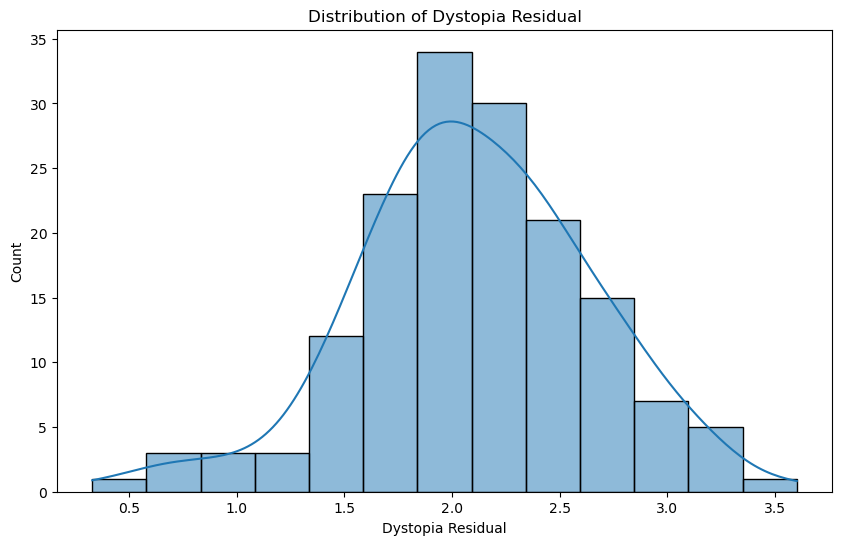

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Dystopia Residual'], kde=True)
plt.title('Distribution of Dystopia Residual')
plt.show()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


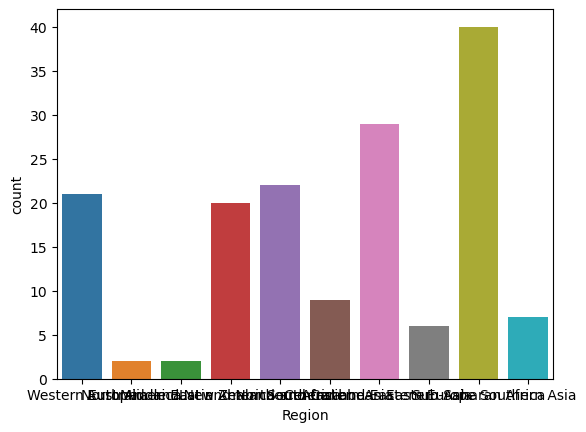

In [25]:
ax = sns.countplot (x='Region',data=df[categorical_cols])
print(df['Region'].value_counts())

Exploring Continuus Columns

0.00041846932380538553


<Axes: xlabel='Happiness Rank', ylabel='Density'>

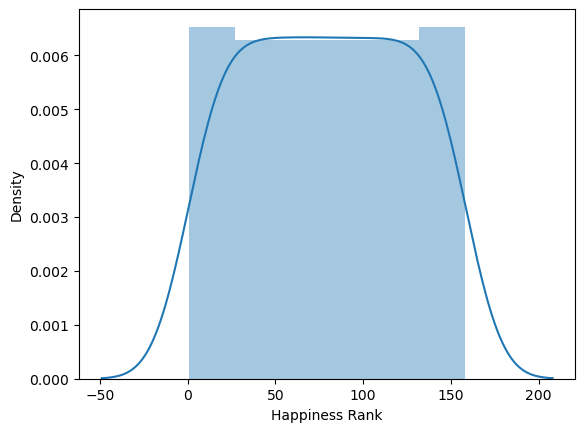

In [26]:
print(df['Happiness Rank'].skew())
sns.distplot(df['Happiness Rank'],kde=True)

0.09776909409344678


<Axes: xlabel='Happiness Score', ylabel='Density'>

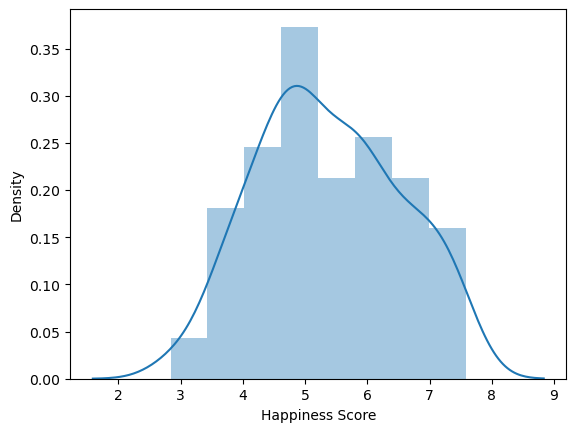

In [27]:
print(df['Happiness Score'].skew())
sns.distplot(df['Happiness Score'],kde=True)

1.9834393956708816


<Axes: xlabel='Standard Error', ylabel='Density'>

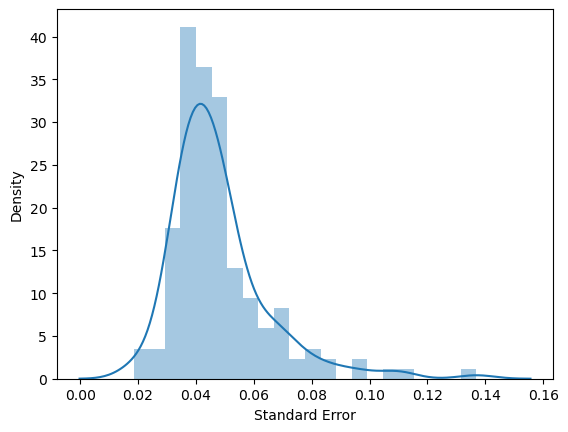

In [28]:
print(df['Standard Error'].skew())
sns.distplot(df['Standard Error'],kde=True)

-0.3175746523312048


<Axes: xlabel='Economy (GDP per Capita)', ylabel='Density'>

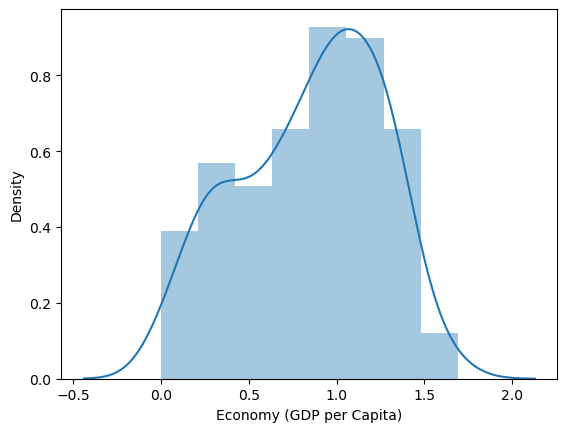

In [29]:
print(df['Economy (GDP per Capita)'].skew())
sns.distplot(df['Economy (GDP per Capita)'],kde=True)

-1.0068931265421133


<Axes: xlabel='Family', ylabel='Density'>

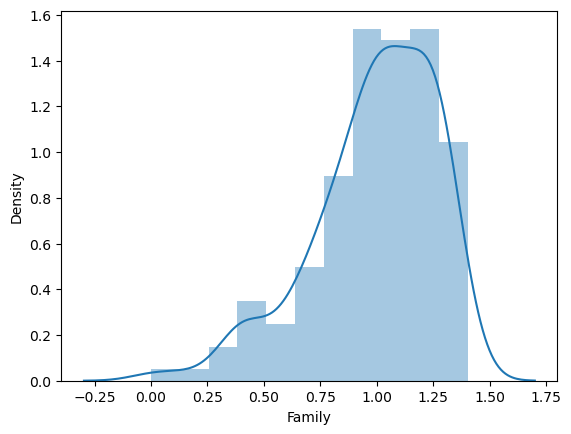

In [30]:
print(df['Family'].skew())
sns.distplot(df['Family'],kde=True)

-0.7053284856924459


<Axes: xlabel='Health (Life Expectancy)', ylabel='Density'>

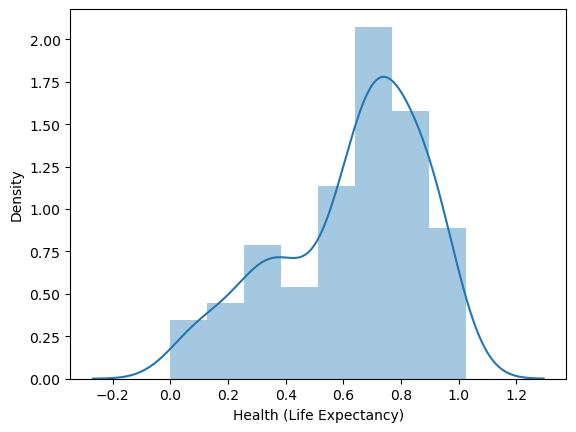

In [31]:
print(df['Health (Life Expectancy)'].skew())
sns.distplot(df['Health (Life Expectancy)'],kde=True)

-0.41346197289710274


<Axes: xlabel='Freedom', ylabel='Density'>

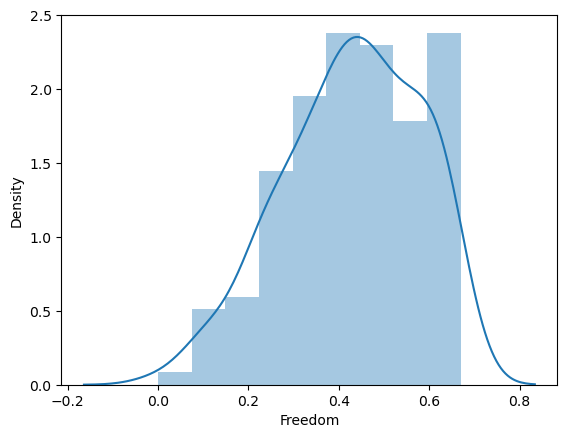

In [32]:
print(df['Freedom'].skew())
sns.distplot(df['Freedom'],kde=True)

1.3854625954673152


<Axes: xlabel='Trust (Government Corruption)', ylabel='Density'>

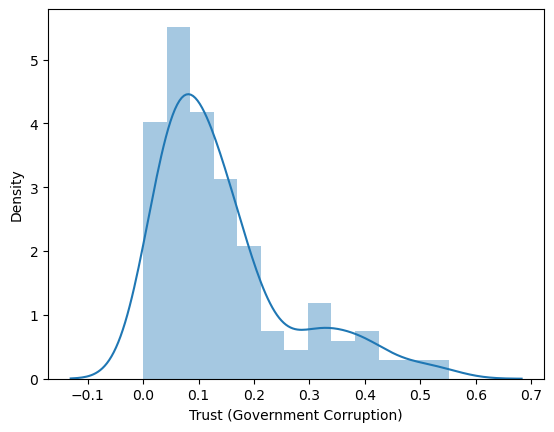

In [33]:
print(df['Trust (Government Corruption)'].skew())
sns.distplot(df['Trust (Government Corruption)'],kde=True)

1.001960575563042


<Axes: xlabel='Generosity', ylabel='Density'>

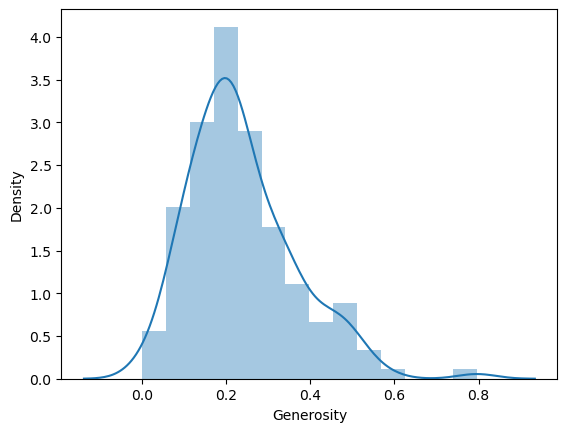

In [34]:
print(df['Generosity'].skew())
sns.distplot(df['Generosity'],kde=True)

-0.23891080938012677


<Axes: xlabel='Dystopia Residual', ylabel='Density'>

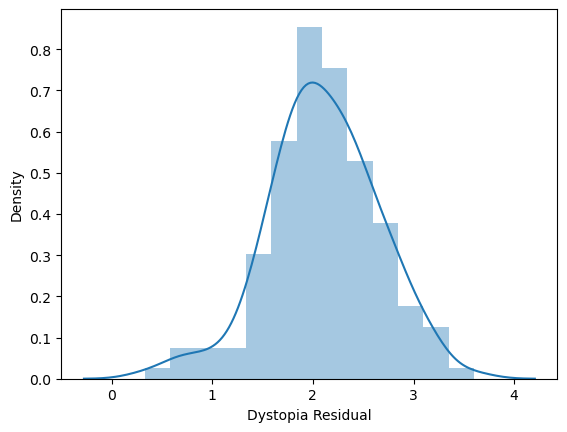

In [35]:
print(df['Dystopia Residual'].skew())
sns.distplot(df['Dystopia Residual'],kde=True)

Skewness found will fix this later in the project

In [36]:
Columns_List = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

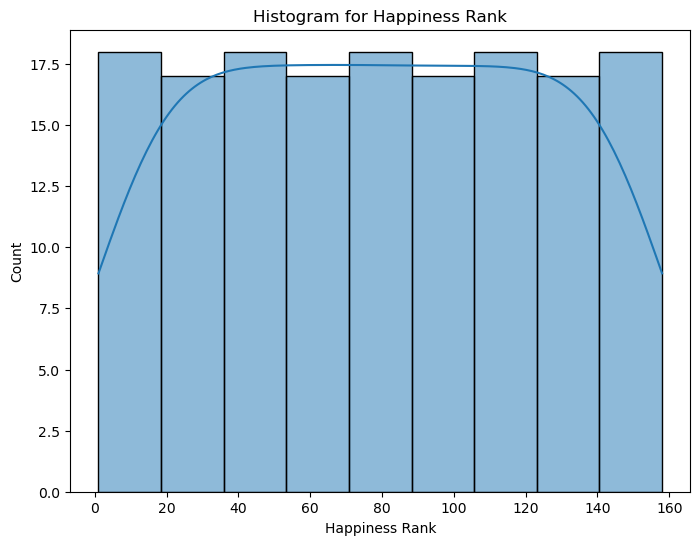

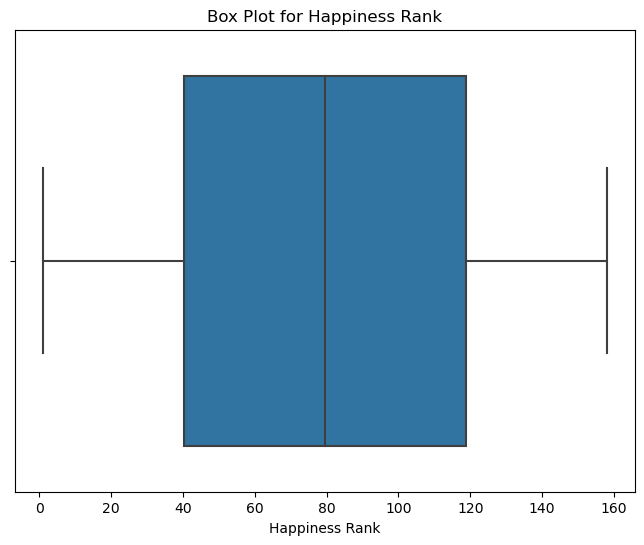

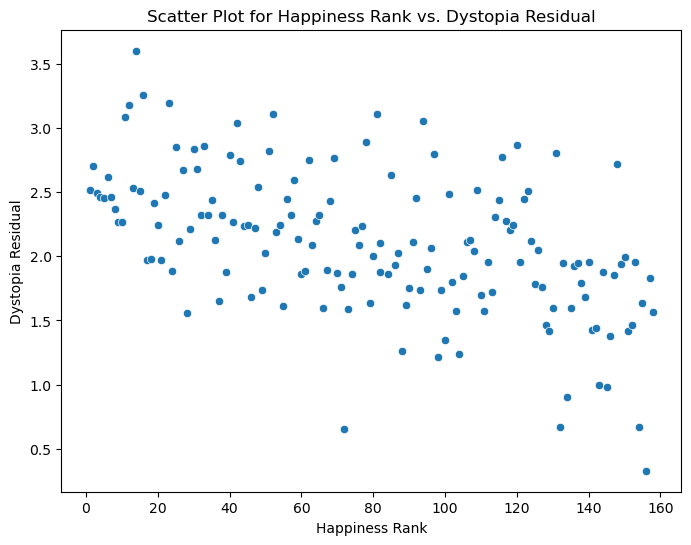

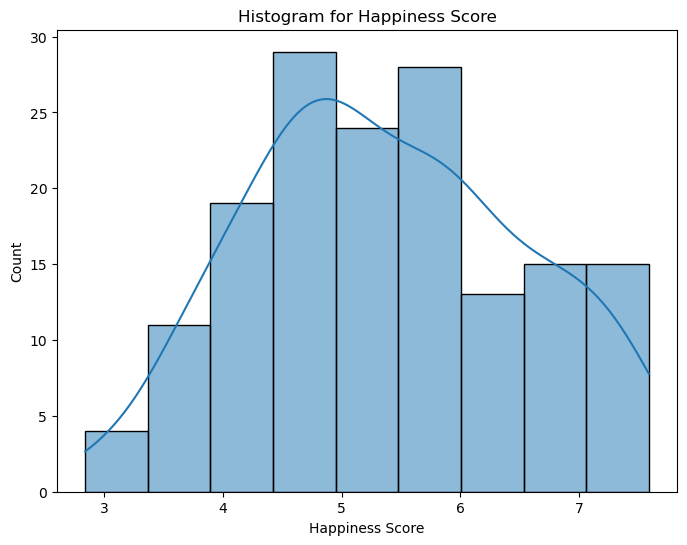

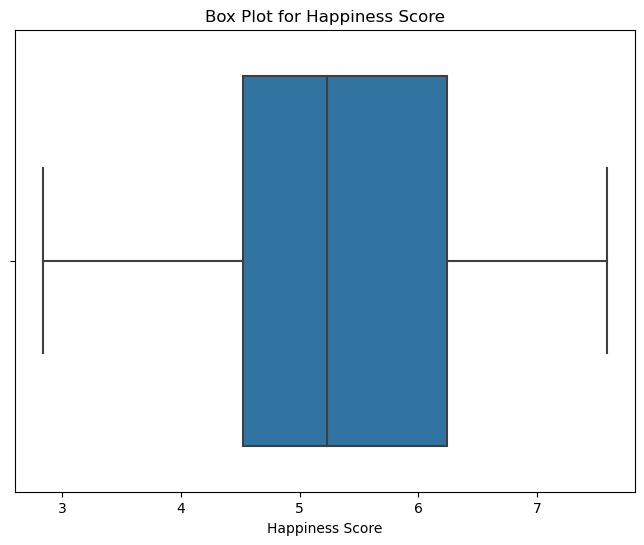

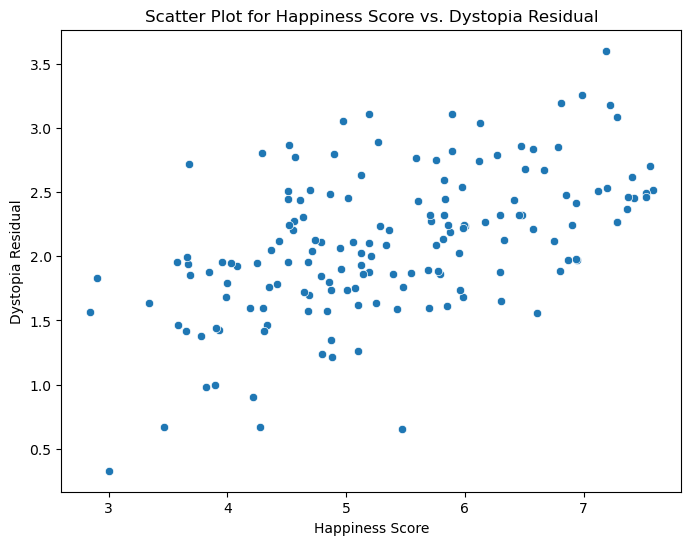

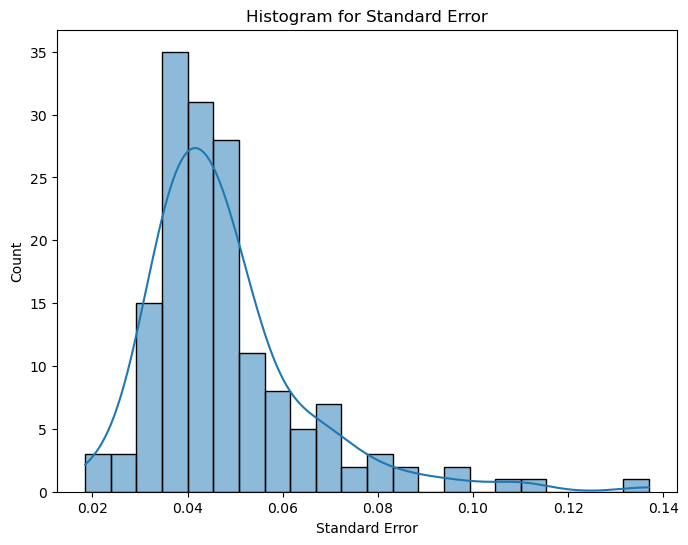

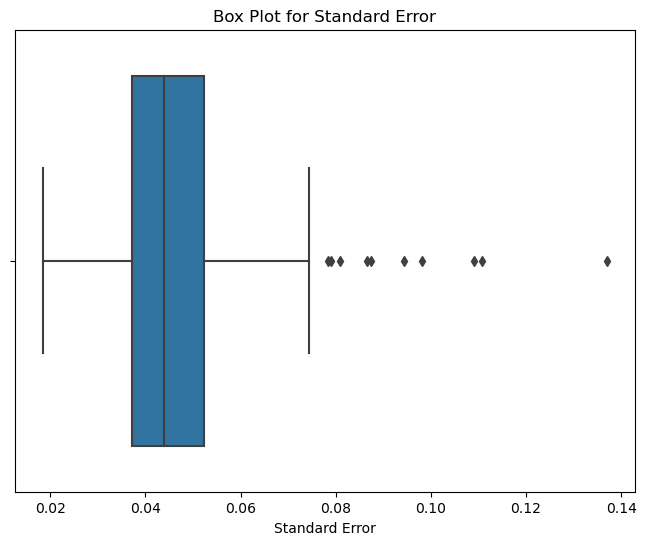

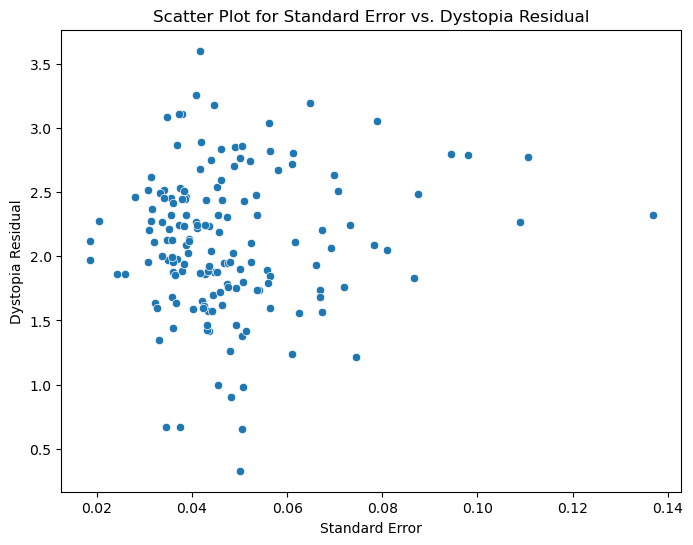

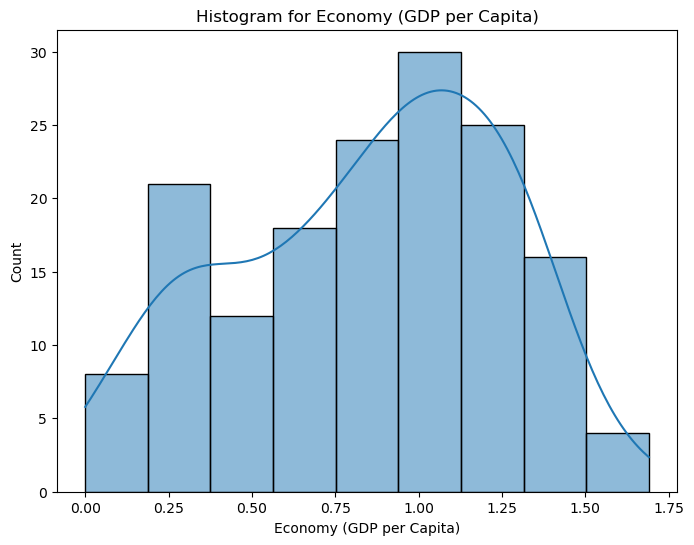

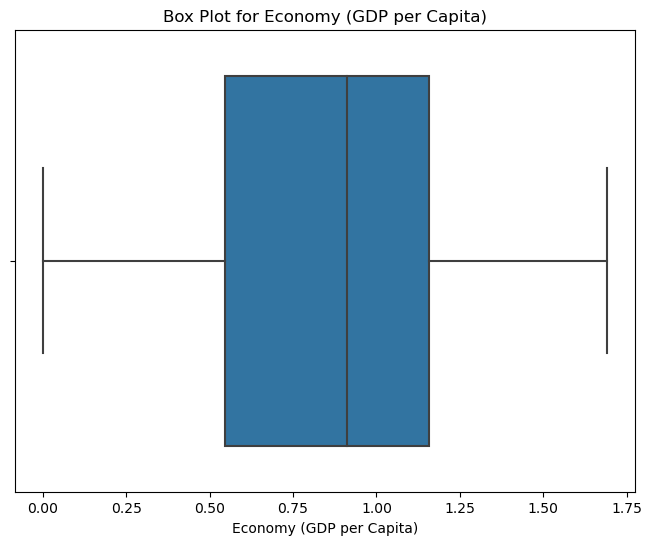

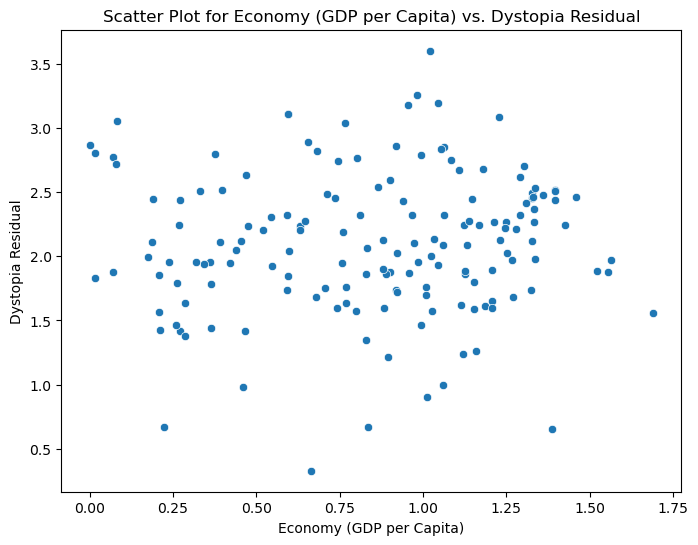

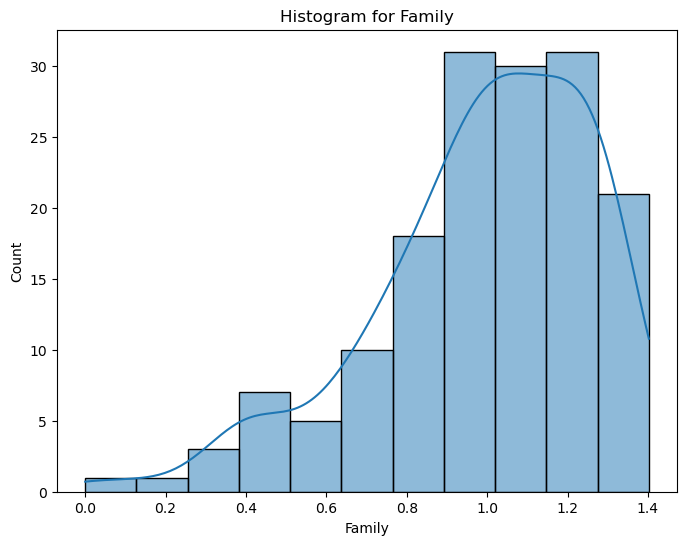

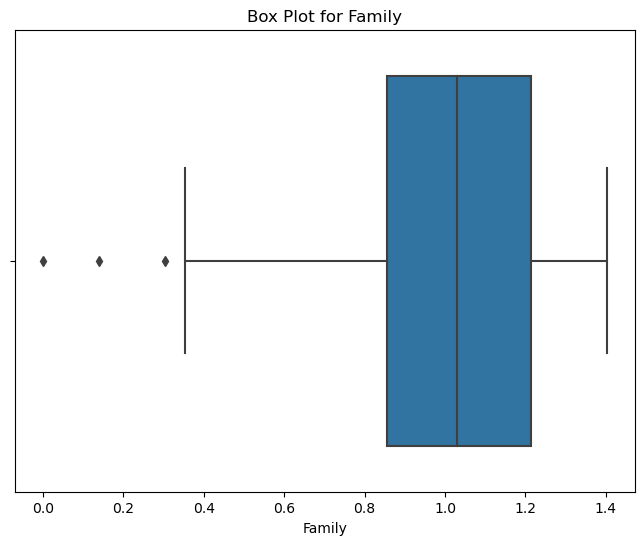

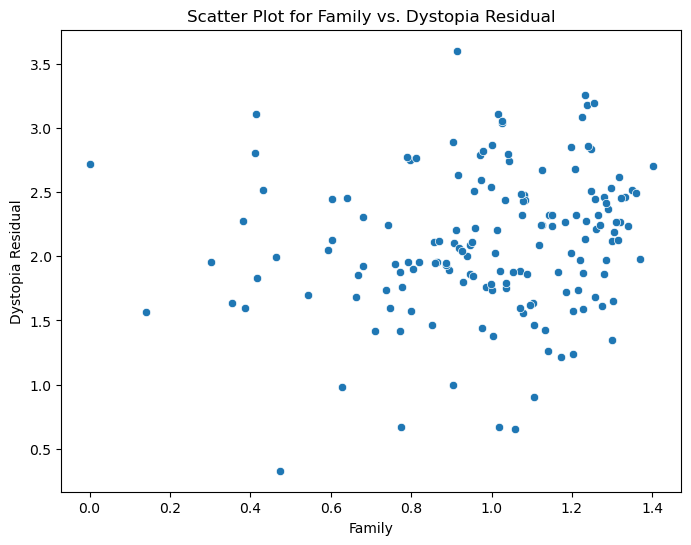

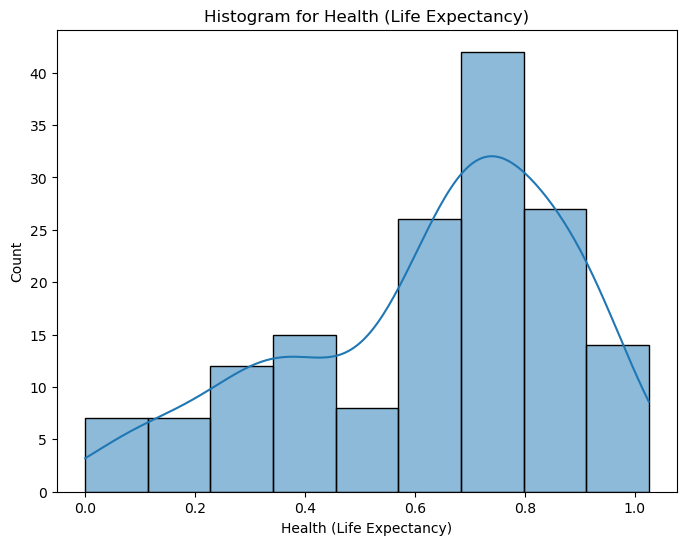

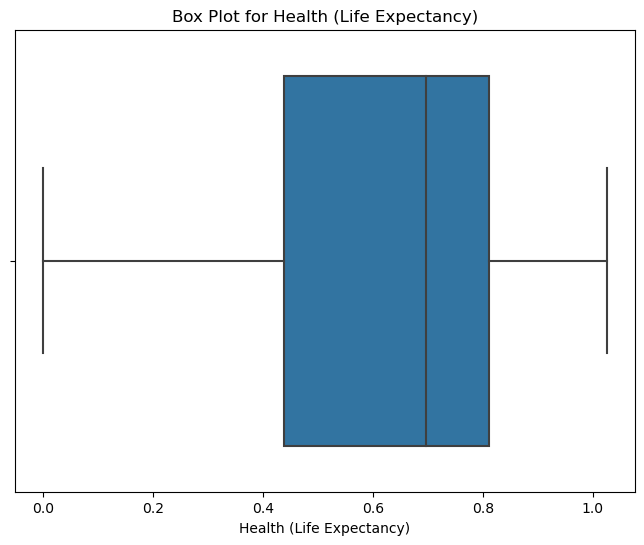

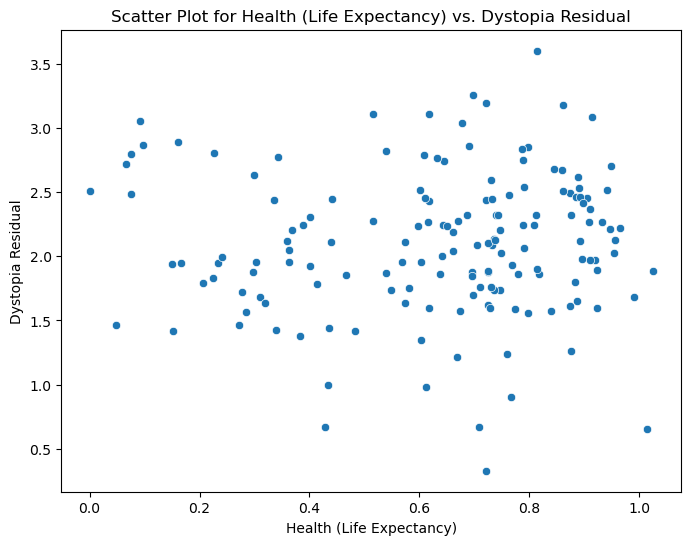

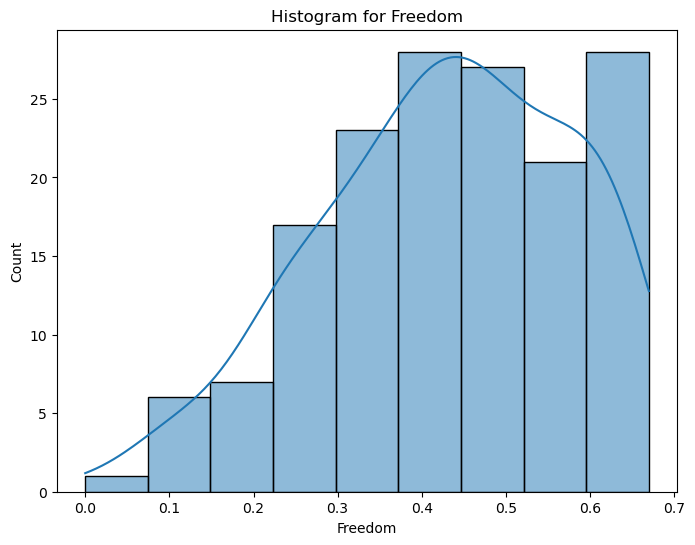

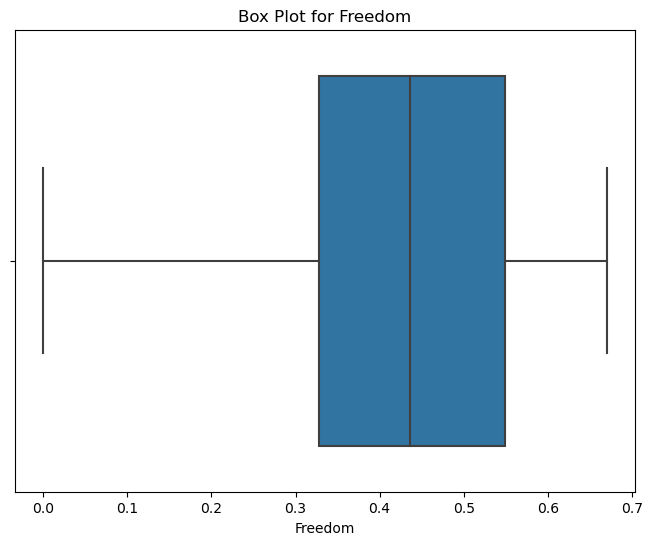

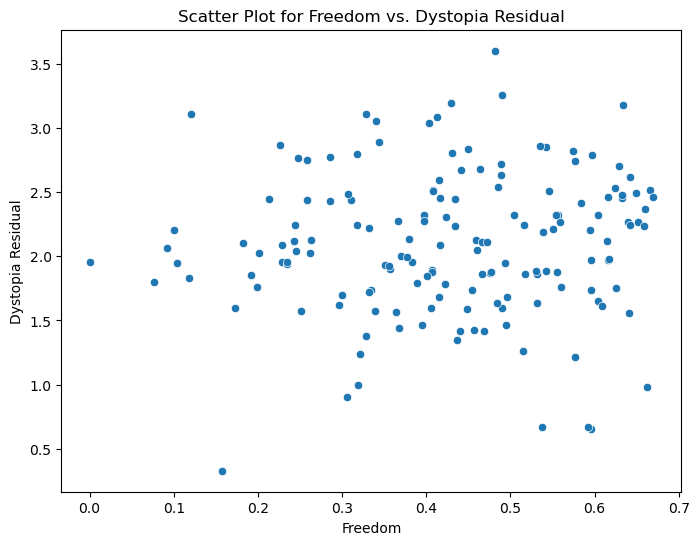

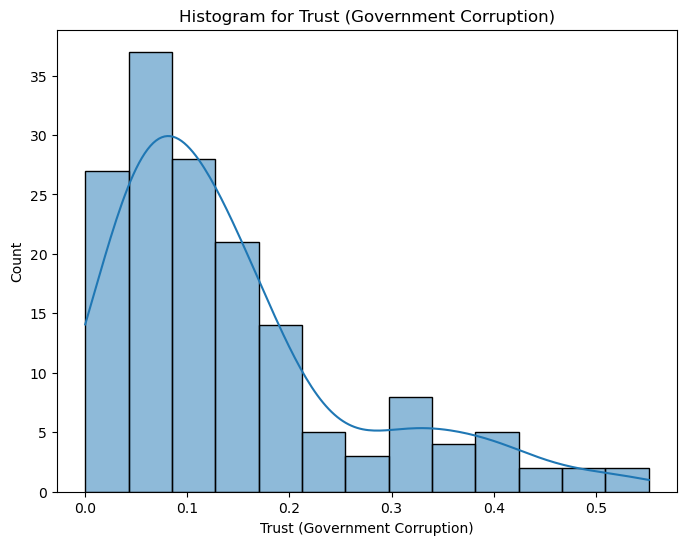

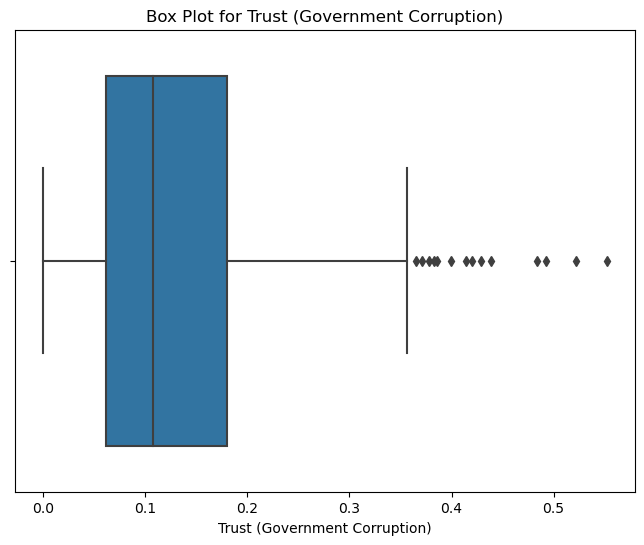

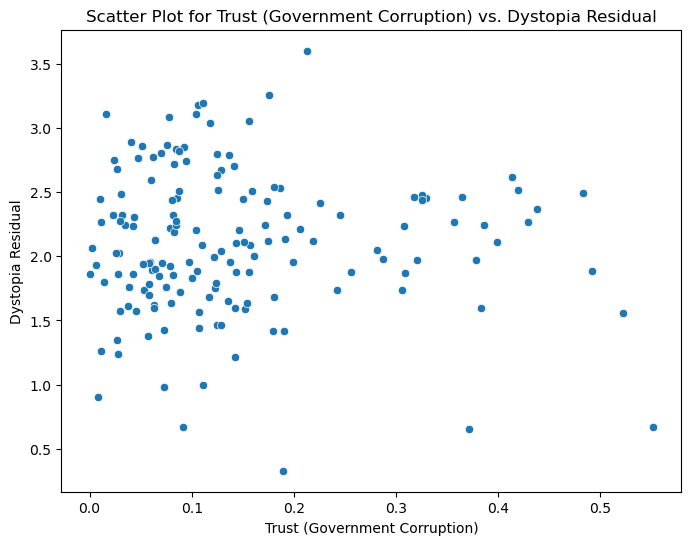

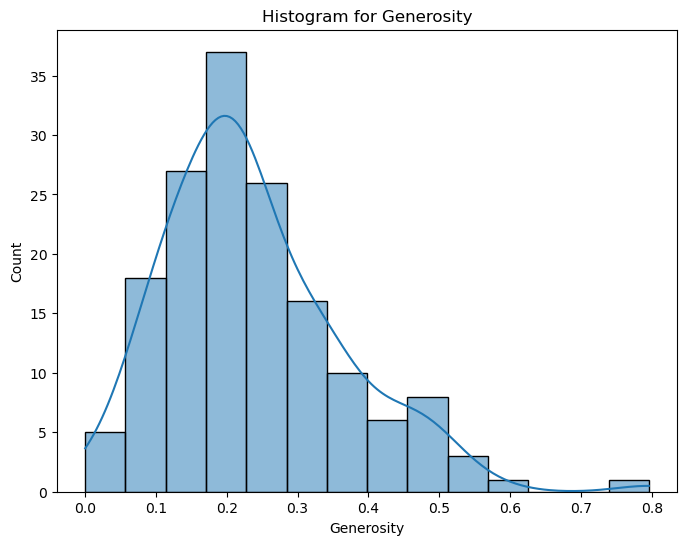

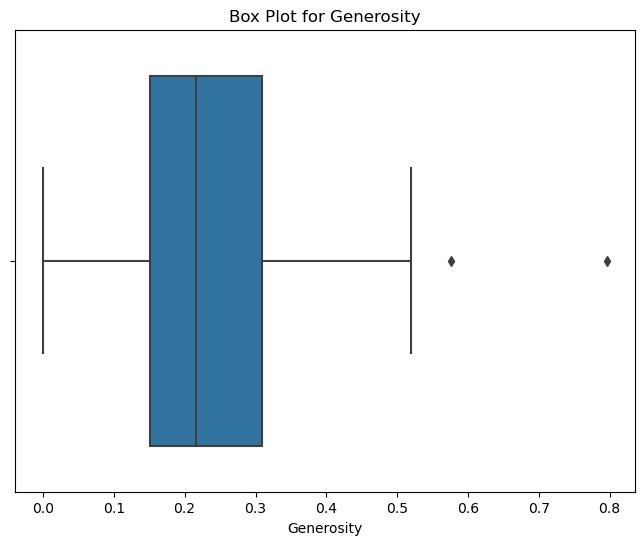

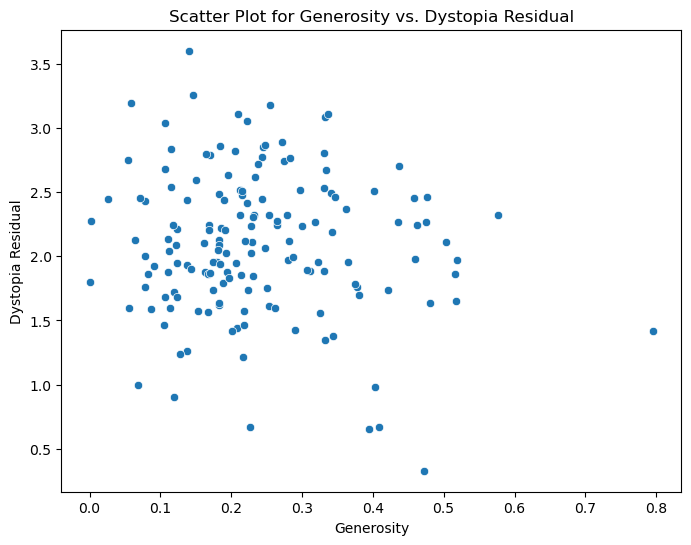

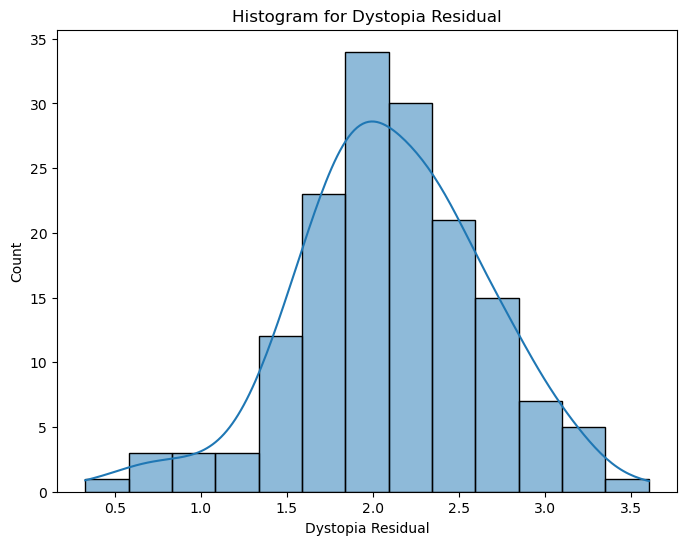

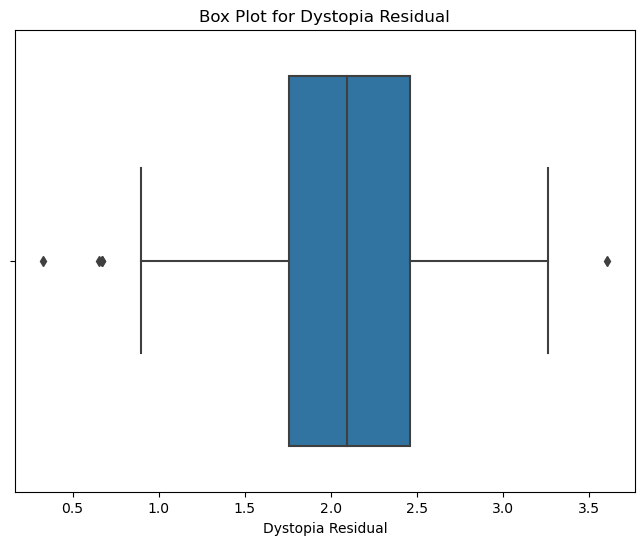

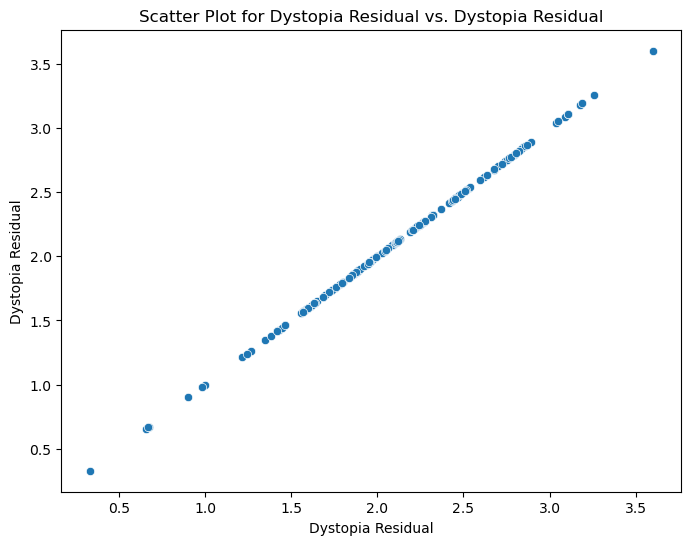

In [37]:
#Function for ploting Histogram, Box Plot, Pair Plot of numerical columns.

for col in Columns_List:

    # Ploting Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()

    # Ploting Box Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

    # Ploting Scatter Plot (assuming 'quality' is the target variable and plot accordingly)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Dystopia Residual', data=df)
    plt.title(f'Scatter Plot for {col} vs. Dystopia Residual')
    plt.show()

We can plot each seperately & it become leangthy for all columns also but hear I have created simple function for ploting all.

# Encoading the Categorical object datatype columns 

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()

In [40]:
for i in  df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

Sucessfully Converted Object Datatype into int datatype
Cheking for non values after applying transformation technique

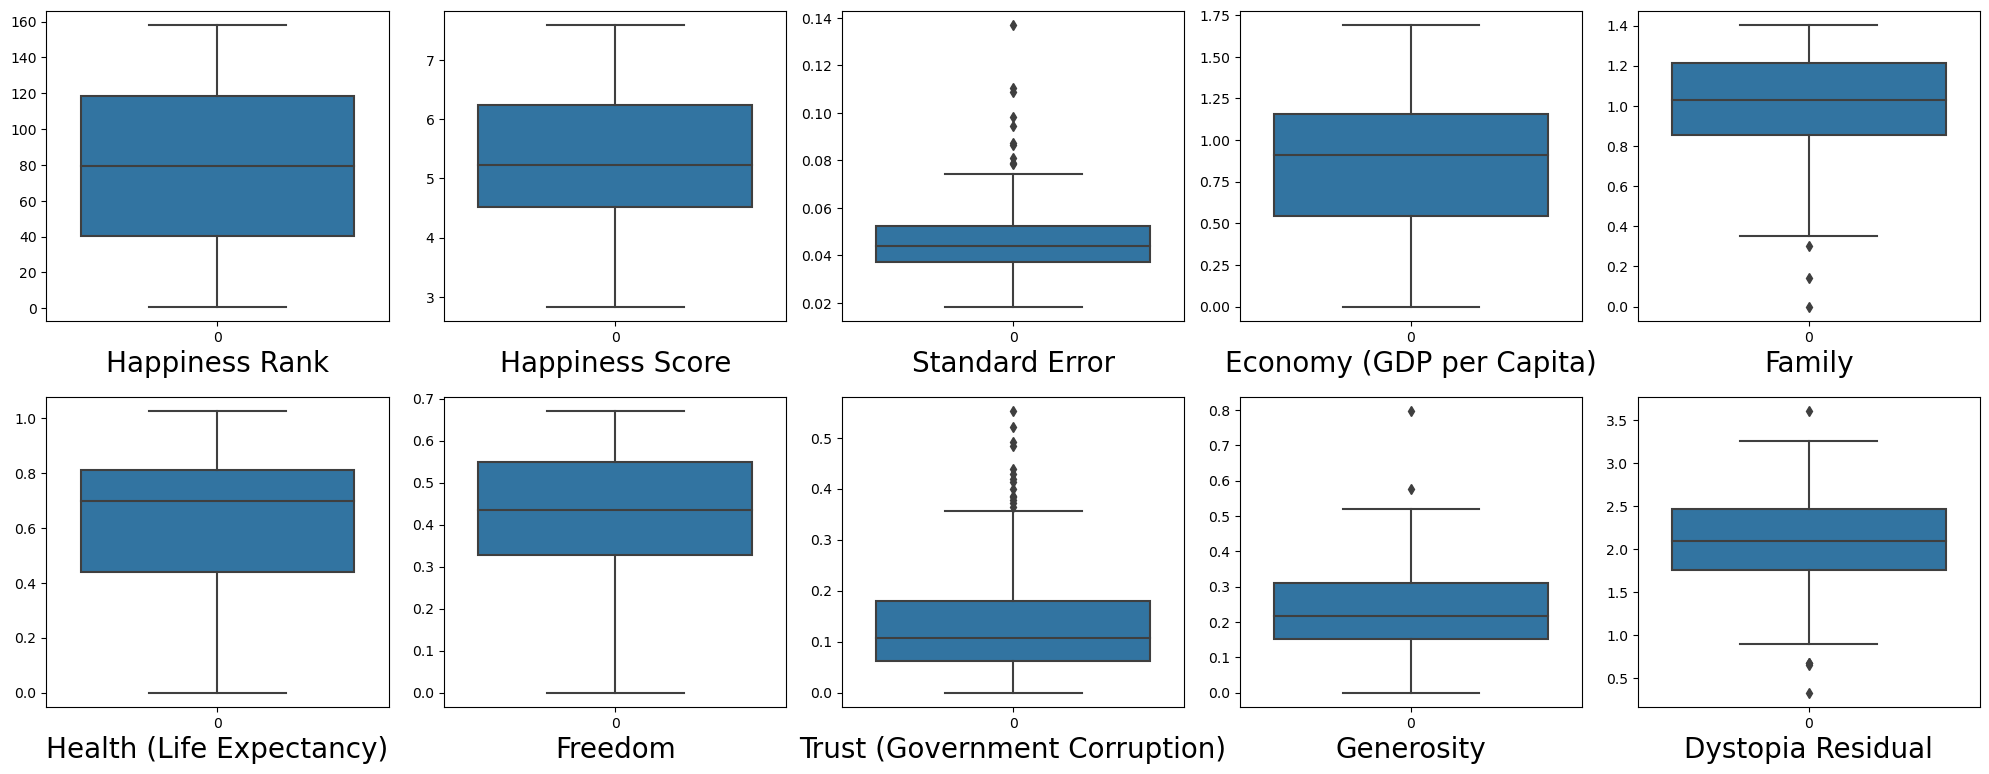

In [42]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number = 1

for column in df[numerical_cols]:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plot_number +=1
    
    
plt.tight_layout()

In [43]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

With the skew method we see that there are column present in our data set that are above the aceptable range of +/-0.5 value however most of those are Categorical columns and do not worry about outliers or skewness in catagorical data therefore we will ignore having said that the skewness that is present 
In our continous data columns in catagorical column we wont have to fix any other concern in our dataset. 

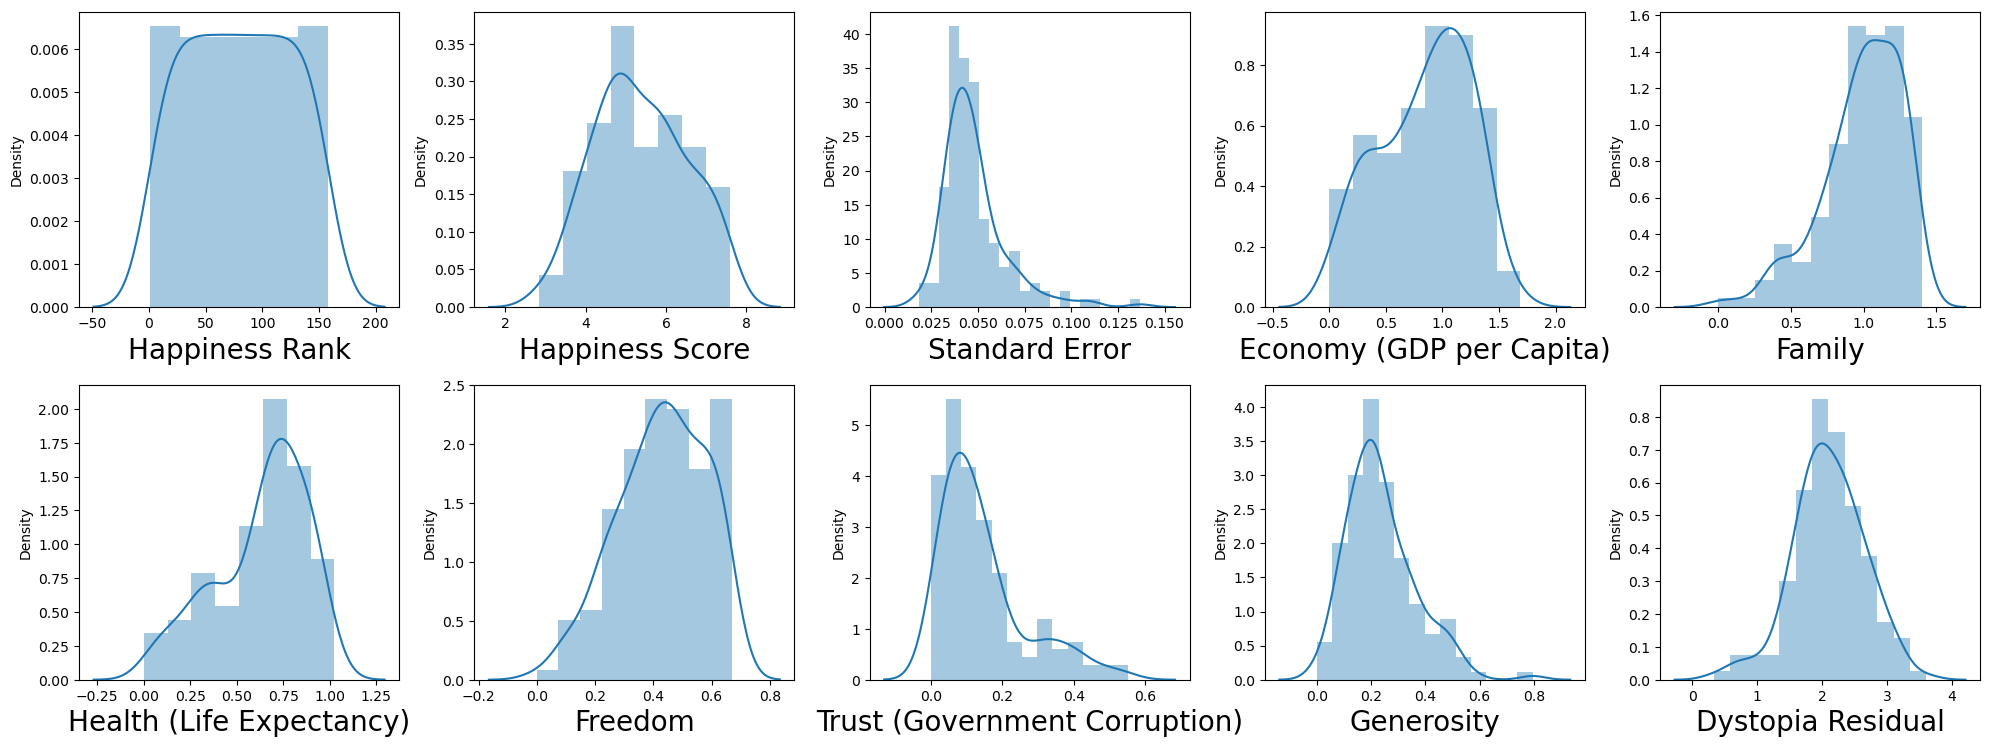

In [44]:
plt.figure(figsize=(20,15),facecolor='white')
plot_numbers=1

for column in df[numerical_cols]:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plot_number +=1
    
plt.tight_layout()    
        

In [45]:
for col in numerical_cols:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [46]:
df[numerical_cols].skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.890608
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.180922
Generosity                       0.650767
Dystopia Residual               -0.238911
dtype: float64

Here we have handle the skewness in continous data

array([[<Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Happiness Rank'}>],
       [<Axes: title={'center': 'Happiness Score'}>,
        <Axes: title={'center': 'Standard Error'}>,
        <Axes: title={'center': 'Economy (GDP per Capita)'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'Health (Life Expectancy)'}>,
        <Axes: title={'center': 'Freedom'}>],
       [<Axes: title={'center': 'Trust (Government Corruption)'}>,
        <Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Dystopia Residual'}>]], dtype=object)

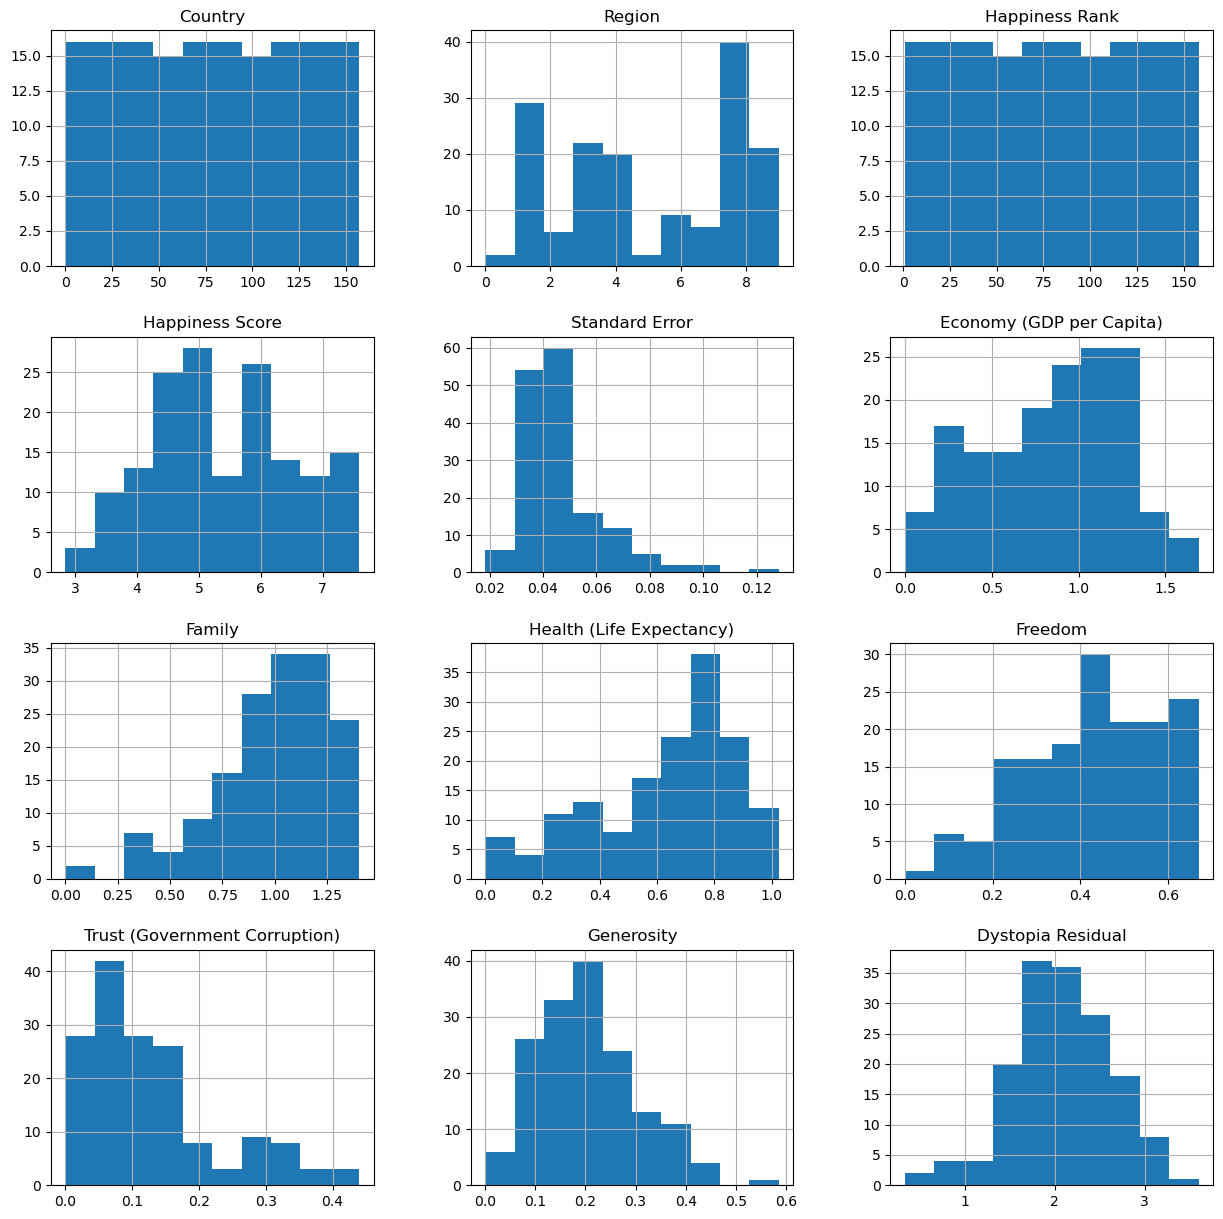

In [47]:
df.hist(figsize=(15,15))

I have generated a histogram for all our dataset columns after applying encoading technique & converting all object datatype columns to numeric datatype values 

In [48]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033276,0.037808,0.159416,0.037829,0.085684,0.081159,0.120628,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.023913,-0.260139,-0.168533,-0.357508,0.092567,0.172181,0.284052,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.161007,-0.785267,-0.733644,-0.735613,-0.556886,-0.369656,-0.162332,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.179857,0.780966,0.740605,0.724200,0.568211,0.392308,0.182488,0.530474
Standard Error,0.033276,-0.023913,0.161007,-0.179857,1.000000,-0.218822,-0.122422,-0.312216,-0.132415,-0.178278,-0.079647,0.082372
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.218822,1.000000,0.645299,0.816478,0.370300,0.298570,-0.016453,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.122422,0.645299,1.000000,0.531104,0.441518,0.200577,0.087310,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.312216,0.816478,0.531104,1.000000,0.360477,0.239113,0.101413,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.132415,0.370300,0.441518,0.360477,1.000000,0.493502,0.383855,0.062783
Trust (Government Corruption),0.081159,0.172181,-0.369656,0.392308,-0.178278,0.298570,0.200577,0.239113,0.493502,1.000000,0.279950,-0.025395


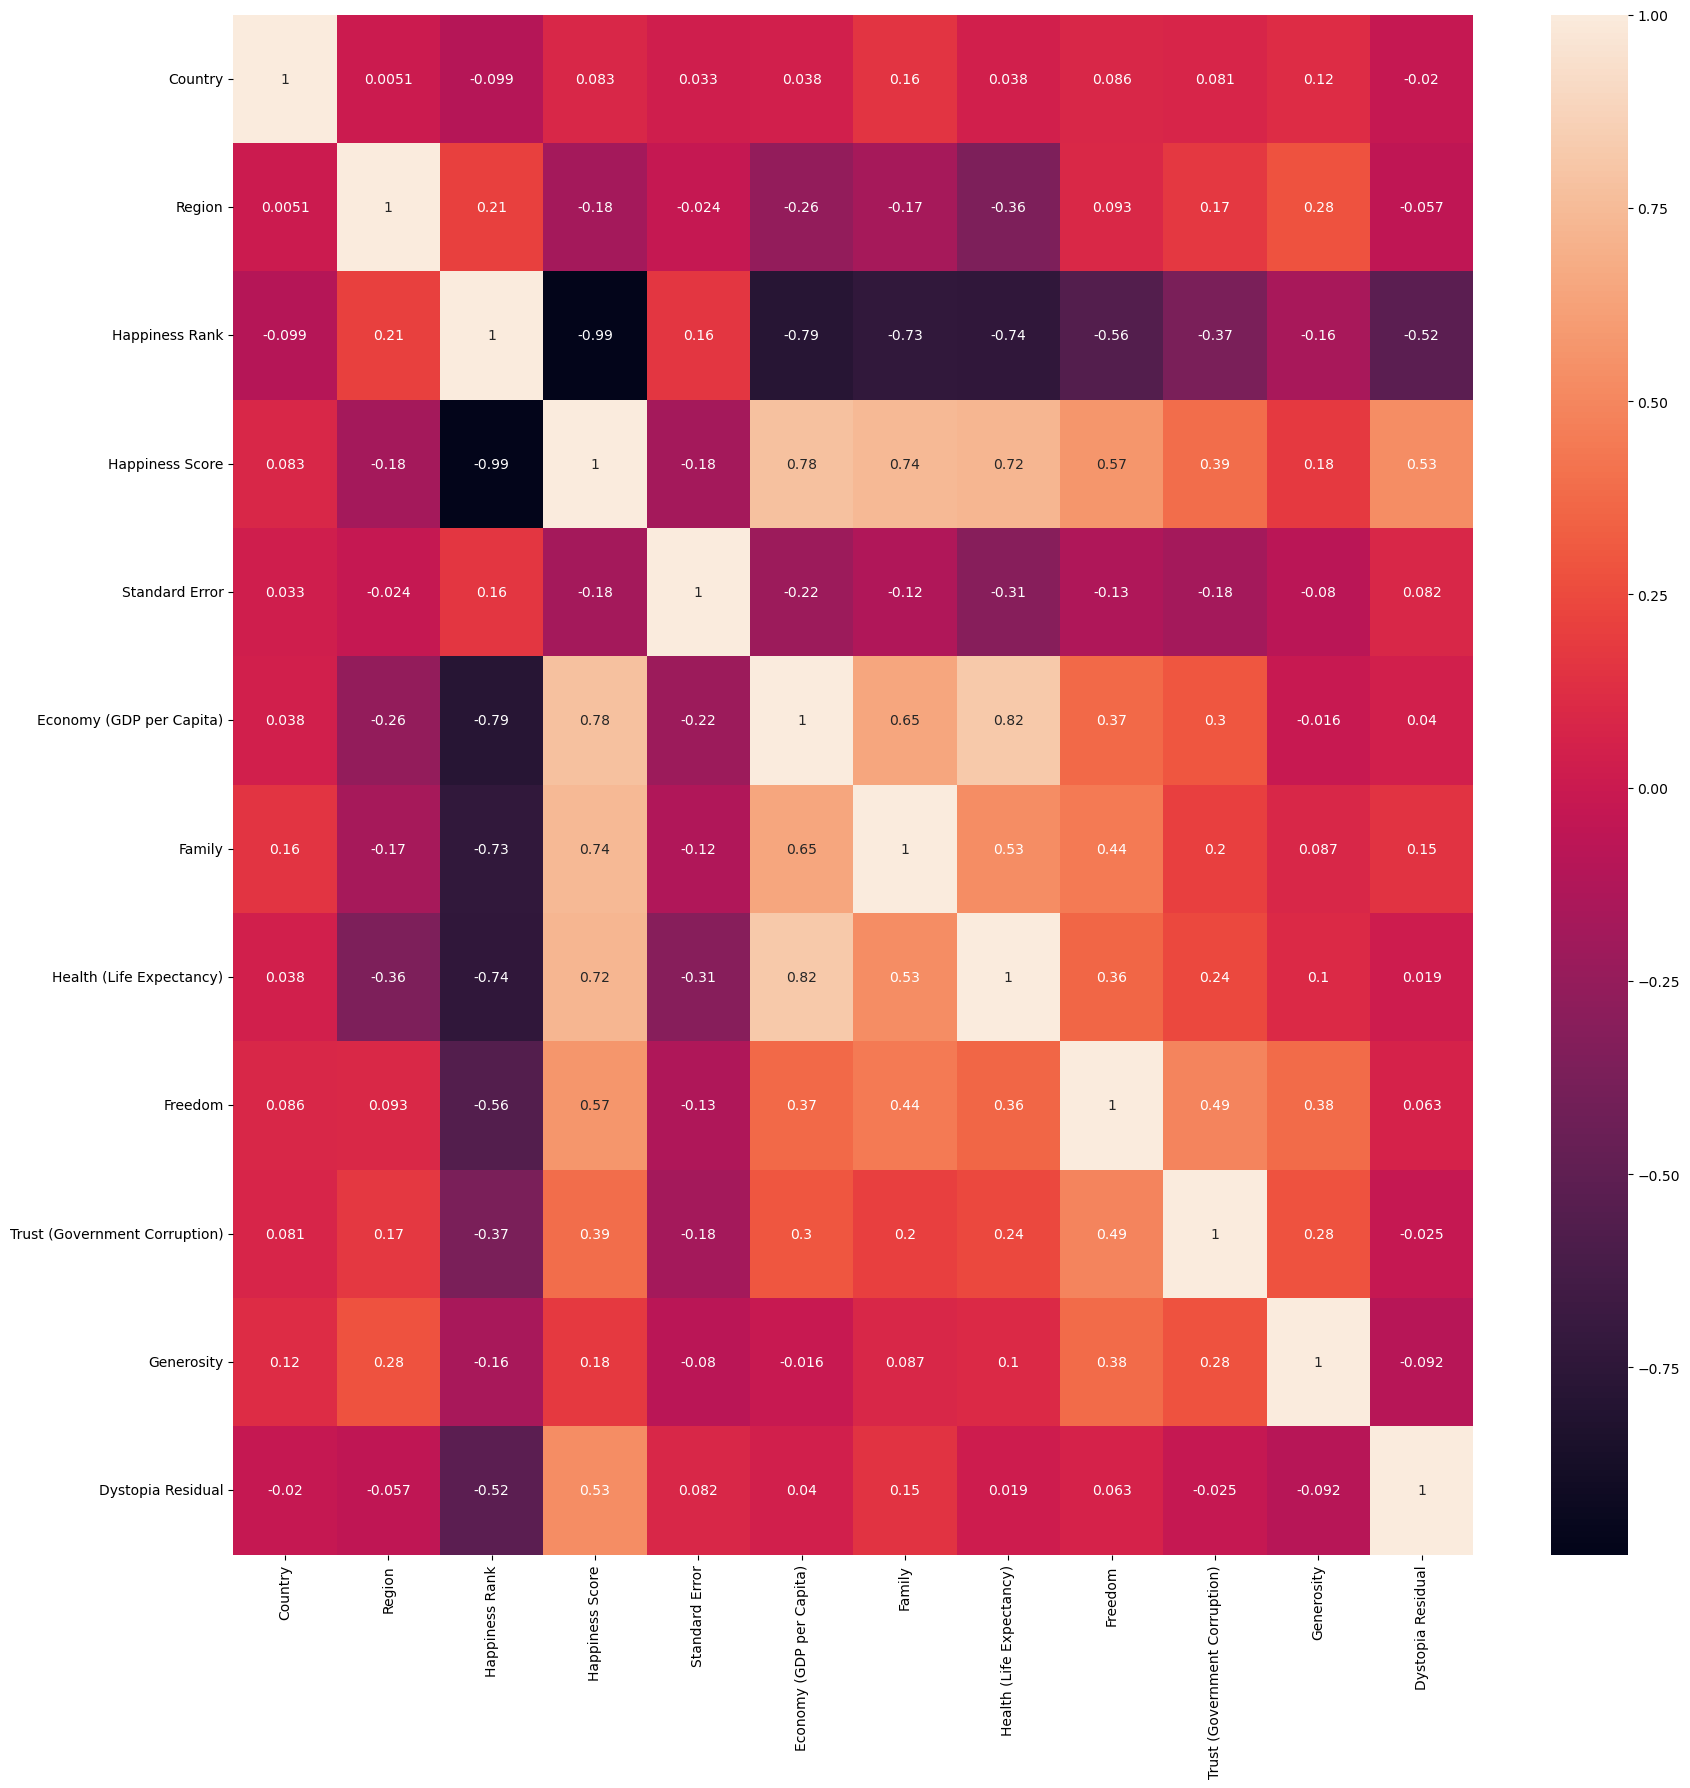

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

Positive Correlation:- A correlation of +1 indicates a perfect positive correlation meaning that both variables move in the same direction together
Negative Correlation:- A Correlation of -1 indicates a perfect negative correlation meaning that as one variable goes up, the other goes down

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns. 

# Correlation Bar Plot Comparing features with our lable

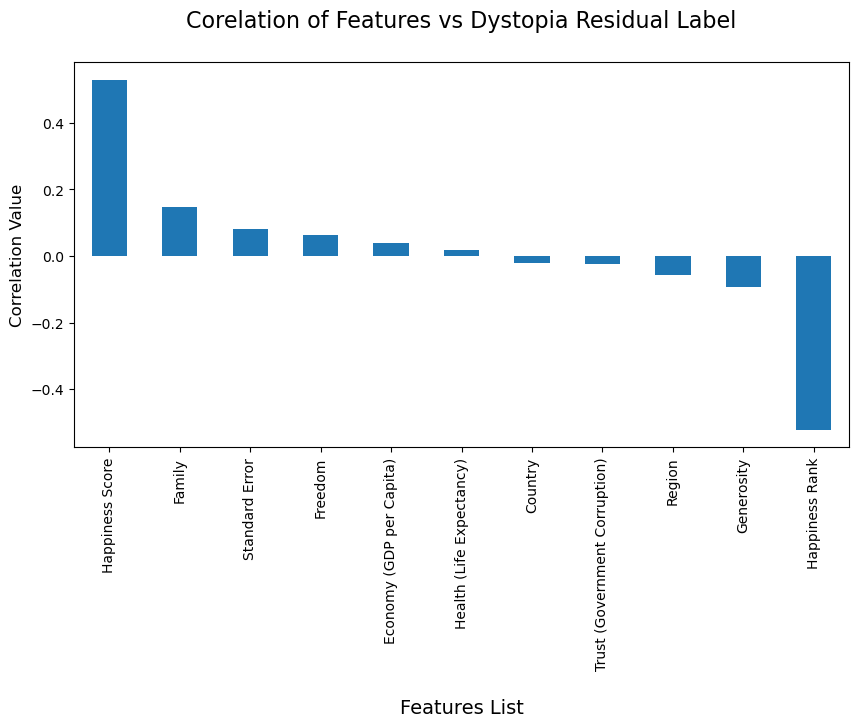

In [52]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Dystopia Residual'].sort_values(ascending=False).drop('Dystopia Residual').plot.bar()
plt.title("Corelation of Features vs Dystopia Residual Label\n", fontsize=16)
plt.xlabel("\nFeatures List",fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clear picture on positive & negative correlation columns we have generated this bar plot & we see that columns Happiness Score, Family, Standard Error, Freedom	, Economy (GDP per Capita), Health (Life Expectancy) are positively correlated to our target label Dystopia Residual while the remaining features are negativelly correlated with our label column.

Splitting the data set into 2 vaiables namely x & y for feture & label 

In [68]:
pip install imbalanced-learn pandas


Note: you may need to restart the kernel to use updated packages.


In [69]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.033541,1.39651,1.34951,0.94143,0.66557,0.350502,0.259884,2.51738
1,58,9,2,7.561,0.047685,1.30232,1.40223,0.94784,0.62877,0.132299,0.362070,2.70201
2,37,9,3,7.527,0.032738,1.32548,1.36058,0.87464,0.64938,0.394451,0.293706,2.49204
3,105,9,4,7.522,0.038066,1.45900,1.33095,0.88521,0.66973,0.311176,0.297872,2.46531
4,24,5,5,7.427,0.034913,1.32629,1.32261,0.90563,0.63297,0.284856,0.377141,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.034054,0.22208,0.77370,0.42864,0.59201,0.439486,0.203985,0.67042
154,13,8,155,3.340,0.035908,0.28665,0.35386,0.31910,0.48450,0.077054,0.167715,1.63328
155,136,4,156,3.006,0.048933,0.66320,0.47489,0.72193,0.15684,0.173163,0.386479,0.32858
156,21,8,157,2.905,0.083035,0.01530,0.41587,0.22396,0.11850,0.095874,0.180044,1.83302


In [70]:
x = df.drop('Dystopia Residual',axis=1)


In [71]:
y = df['Dystopia Residual']

Resolving the class imbalance issue in our column

In [72]:
y.value_counts()

Dystopia Residual
2.51738    1
2.51767    1
1.80101    1
1.57059    1
1.24074    1
          ..
2.24729    1
1.61583    1
2.44649    1
2.32407    1
1.56726    1
Name: count, Length: 158, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
sm = SMOTE()

In [75]:
y.value_counts()

Dystopia Residual
2.51738    1
2.51767    1
1.80101    1
1.57059    1
1.24074    1
          ..
2.24729    1
1.61583    1
2.44649    1
2.32407    1
1.56726    1
Name: count, Length: 158, dtype: int64

In [76]:
# Convert charges into categorical variable by binning
df['Dystopia Residual_category'] = pd.cut(df['Dystopia Residual'], bins=3, labels=[0,1,2])

# Define X and Y
x = df.drop(['Dystopia Residual', 'Dystopia Residual_category'], axis=1)
y = df['Dystopia Residual_category']

# Resample using SMOTE
X_resampled, Y_resampled = sm.fit_resample(x, y)


Binning the target variable Dystopia Residual and converting it into a categorical variable can be a strategy in certain scenarios in a data science project. Here's why this approach might be used:
Dealing with Imbalanced Classes: 
Simplifying the Prediction Task:
Interpretability:
Addressing Nonlinear Relationships: 
However, it's essential to consider potential drawbacks:
Information Loss:
Arbitrary Binning Criteria: 
Model Performance: 

In [77]:
X,Y = sm.fit_resample(x,y)

After applying Over sampling we are once again listing the values of our label column to cross verify the updeted information Hence we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the ML model does not get biased towards one category

# Scaling & Feature

In [78]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.23877001,  1.30025593, -1.72099989, ...,  1.57743784,
         2.24501064,  0.52680978],
       [-0.44946522,  1.30025593, -1.69907456, ...,  1.33245589,
         0.03377212,  1.56369393],
       [-0.90989302,  1.30025593, -1.67714922, ...,  1.4696591 ,
         2.69038876,  0.87000346],
       ...,
       [ 1.26069514, -0.37544095,  1.67742676, ..., -1.80923785,
         0.44787992,  1.81137234],
       [-1.26069514,  0.96511655,  1.69935209, ..., -2.06447176,
        -0.33536184, -0.28333124],
       [ 1.37032081,  0.96511655,  1.72127743, ..., -0.42662099,
        -0.27395059, -0.54482432]])

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score, GridSearchCV


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression()

maxAcc = 0
best_rs = 0

for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    ac = accuracy_score(y_test, pred)
    
    if ac > maxAcc:
        maxAcc = ac
        best_rs = i

print('Best accuracy score:', maxAcc)
print('Random State:', best_rs)


Best accuracy score: 0.975
Random State: 7


In [81]:
# Let us split the data now at that random state
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=60)


In [82]:
# Print the size of x_train
print("Size of x_train:", x_train.shape)

# Print the size of x_test
print("Size of x_test:", x_test.shape)

# Print the size of y_train
print("Size of y_train:", y_train.shape)

# Print the size of y_test
print("Size of y_test:", y_test.shape)

Size of x_train: (118, 11)
Size of x_test: (40, 11)
Size of y_train: (118,)
Size of y_test: (40,)


# Machine Lerning Model for Classification with Evaluation Metrice

In [83]:
def classify(clf, x, y):
    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=868)

    # Training the model
    clf.fit(x_train, y_train)

    # Predicting Y test
    pred = clf.predict(x_test)

    # Accuracy Score
    acc_score = accuracy_score(y_test, pred)
    print("Accuracy Score:", acc_score)

    # Confusion Matrix
    print('Confusion Matrix:\n', confusion_matrix(y_test, pred))

    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)

    # Cross Validation Score
    cv_scores = cross_val_score(clf, x, y, cv=5)
    cv_mean = cv_scores.mean()
    print("Cross Validation Score:", cv_mean)

    # Result of accuracy minus CV scores
    result = acc_score - cv_mean
    print("\nAccuracy Score minus Cross Validation Score is", result)

# Logestic Regression

In [84]:
clf = LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.925
Confusion Matrix:
 [[ 2  1  0]
 [ 0 29  1]
 [ 0  1  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.94      0.97      0.95        30
           2       0.86      0.86      0.86         7

    accuracy                           0.93        40
   macro avg       0.93      0.83      0.87        40
weighted avg       0.93      0.93      0.92        40

Cross Validation Score: 0.8923387096774194

Accuracy Score minus Cross Validation Score is 0.032661290322580694


# Dession TreeClassification

In [85]:
clf = DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.575
Confusion Matrix:
 [[ 0  3  0]
 [ 2 18 10]
 [ 0  2  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.78      0.60      0.68        30
           2       0.33      0.71      0.45         7

    accuracy                           0.57        40
   macro avg       0.37      0.44      0.38        40
weighted avg       0.65      0.57      0.59        40

Cross Validation Score: 0.3596774193548387

Accuracy Score minus Cross Validation Score is 0.21532258064516124


# Random Forest Classifier

In [86]:
clf = RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.775
Confusion Matrix:
 [[ 0  3  0]
 [ 0 27  3]
 [ 0  3  4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      0.90      0.86        30
           2       0.57      0.57      0.57         7

    accuracy                           0.78        40
   macro avg       0.46      0.49      0.48        40
weighted avg       0.71      0.78      0.74        40

Cross Validation Score: 0.473991935483871

Accuracy Score minus Cross Validation Score is 0.30100806451612905


# SVC

In [87]:
clf = SVC()
classify(clf,x,y)

Accuracy Score: 0.825
Confusion Matrix:
 [[ 0  3  0]
 [ 0 30  0]
 [ 0  4  3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.81      1.00      0.90        30
           2       1.00      0.43      0.60         7

    accuracy                           0.82        40
   macro avg       0.60      0.48      0.50        40
weighted avg       0.78      0.82      0.78        40

Cross Validation Score: 0.7905241935483872

Accuracy Score minus Cross Validation Score is 0.034475806451612745


# KNeighborsClassifier

In [88]:
clf = KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.825
Confusion Matrix:
 [[ 0  3  0]
 [ 0 29  1]
 [ 0  3  4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.83      0.97      0.89        30
           2       0.80      0.57      0.67         7

    accuracy                           0.82        40
   macro avg       0.54      0.51      0.52        40
weighted avg       0.76      0.82      0.79        40

Cross Validation Score: 0.7465725806451614

Accuracy Score minus Cross Validation Score is 0.07842741935483855


# XGB

In [89]:
!pip install xgboost


In [90]:
import xgboost as xgb

clf = xgb.XGBClassifier()
classify(clf,x,y)

Accuracy Score: 0.775
Confusion Matrix:
 [[ 1  2  0]
 [ 0 26  4]
 [ 0  3  4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.84      0.87      0.85        30
           2       0.50      0.57      0.53         7

    accuracy                           0.78        40
   macro avg       0.78      0.59      0.63        40
weighted avg       0.79      0.78      0.77        40

Cross Validation Score: 0.4411290322580645

Accuracy Score minus Cross Validation Score is 0.33387096774193553


# GradientBoostingClassifier

In [91]:
clf = GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.75
Confusion Matrix:
 [[ 1  2  0]
 [ 0 24  6]
 [ 0  2  5]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.86      0.80      0.83        30
           2       0.45      0.71      0.56         7

    accuracy                           0.75        40
   macro avg       0.77      0.62      0.63        40
weighted avg       0.80      0.75      0.76        40

Cross Validation Score: 0.3983870967741935

Accuracy Score minus Cross Validation Score is 0.3516129032258065


# Frome the above Evaluation Metrics, we can  clearly see that RandomForestClassifier is gioving best f1 score and least difference between accuracy score  & CV score so  selecting RandomForestClassifier ad a our final model 

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Confusion Matrix: ", confusion_matrix(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))


Accuracy Score:  0.875
Confusion Matrix:  [[ 1  3  0]
 [ 1 28  0]
 [ 0  1  6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.88      0.97      0.92        29
           2       1.00      0.86      0.92         7

    accuracy                           0.88        40
   macro avg       0.79      0.69      0.72        40
weighted avg       0.86      0.88      0.86        40



# Hyper Parameter tuning on LogisticRegression

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

par = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300]  # Maximum number of iterations taken for the solvers to converge
}

# Creating a GridSearchCV object
grid = GridSearchCV(LogisticRegression(), param_grid=par, verbose=2, n_jobs=1)

# Fitting the grid to the training data
grid.fit(x_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=l1, sol

GridSearchCV(estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             verbose=2)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(random_state=487)
log_reg.fit(x_train, y_train)
pred_log_reg = log_reg.predict(x_test)

print('Accuracy:', accuracy_score(y_test, pred_log_reg))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_log_reg))
print('Classification Report:\n', classification_report(y_test, pred_log_reg))


Accuracy: 0.875
Confusion Matrix:
 [[ 1  3  0]
 [ 1 28  0]
 [ 0  1  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.88      0.97      0.92        29
           2       1.00      0.86      0.92         7

    accuracy                           0.88        40
   macro avg       0.79      0.69      0.72        40
weighted avg       0.86      0.88      0.86        40



In [ ]:
After twining parameters we are going the best accuracy score 0.88 which is less than the accuracy score by LogisticRegression()
without hyper parameter tunning so lets model in by defoult LogisticRegression


# AUC ROC Cureve

In [120]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics


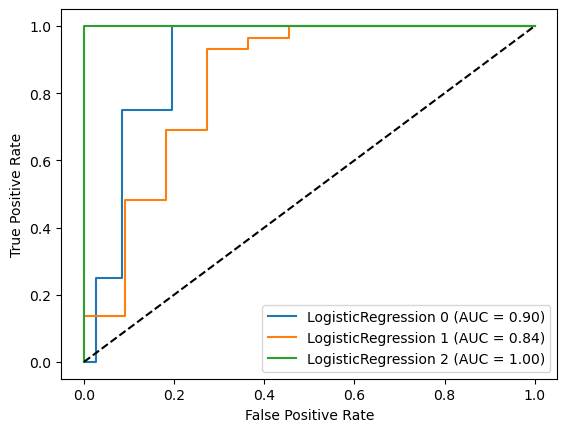

Overall AUC Score: 0.913256124463021


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt


# Binarize the labels for each class
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Predicting the probability of each class in X-test
y_pred_prob = log_reg.predict_proba(x_test)

# Compute ROC-AUC score for each class
auc_scores = []
for i in range(len(log_reg.classes_)):
    auc_score = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'LogisticRegression {i} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Overall AUC score
overall_auc_score = np.mean(auc_scores)
print('Overall AUC Score:', overall_auc_score)


# Confusion Matrix

In [104]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


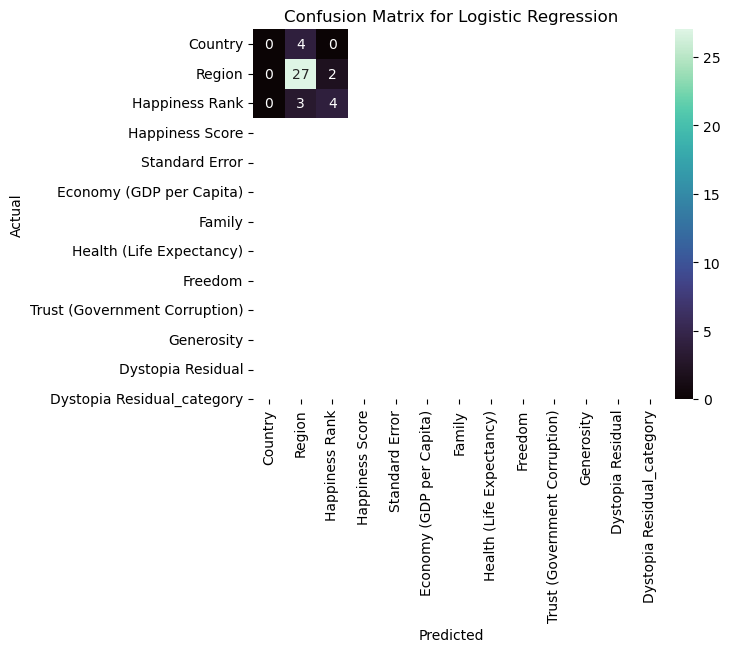

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set using the logistic regression model 'rf'
predrf = rf.predict(x_test)

# Define class names if applicable
class_names = df.columns  # Assuming these are the class names

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predrf)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='mako', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


With the help of above confusion matrix I'm able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction
(depicting in the blank boxes)

# Saving the Model

In [128]:
import pickle

In [129]:
filename='World Happiness Projects Solution file.pkl'

In [130]:
pickle.dump(rf,open(filename,'wb'))

In [131]:
#Conclusion
load_model=pickle.load(open('World Happiness Projects Solution file.pkl','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

77.5


This analysis was for practice

# Bivariate Analysis

<Axes: xlabel='Country', ylabel='Region'>

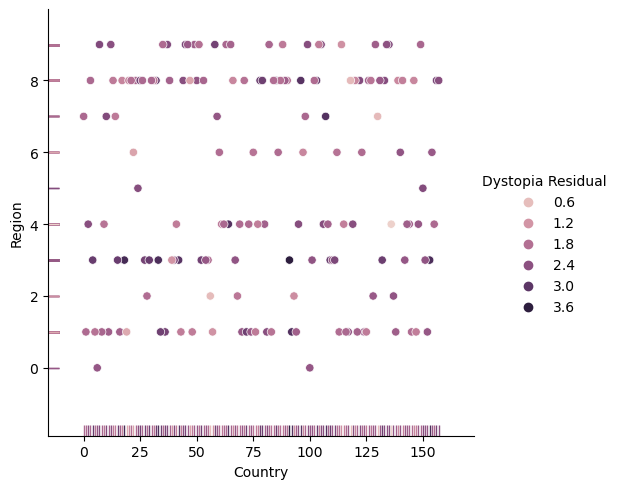

In [55]:
sns.relplot(data=df, x='Country', y='Region', hue='Dystopia Residual')
sns.rugplot(data=df, x='Country', y='Region', hue='Dystopia Residual', legend=False)

<Axes: xlabel='Country', ylabel='Happiness Rank'>

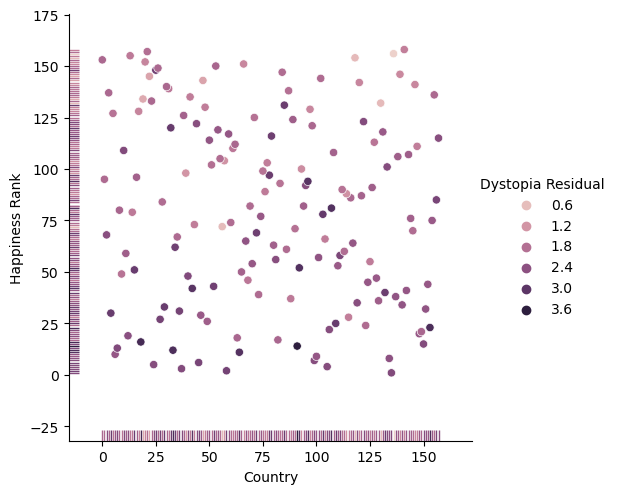

In [56]:
sns.relplot(data=df, x='Country', y='Happiness Rank', hue='Dystopia Residual')
sns.rugplot(data=df, x='Country', y='Happiness Rank', hue='Dystopia Residual', legend=False)

<Axes: xlabel='Country', ylabel='Happiness Score'>

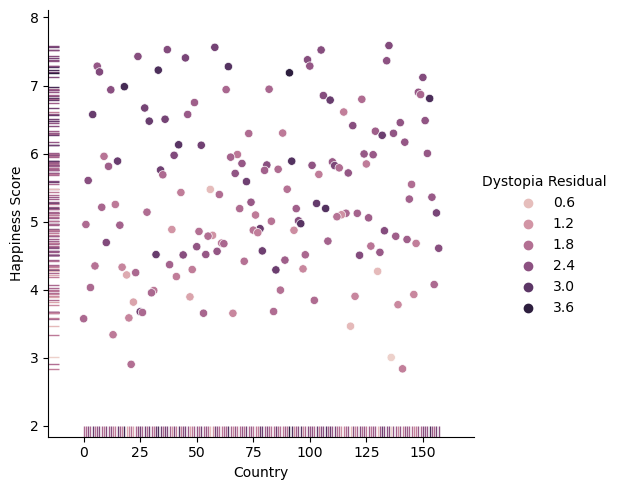

In [57]:
sns.relplot(data=df, x='Country', y='Happiness Score', hue='Dystopia Residual')
sns.rugplot(data=df, x='Country', y='Happiness Score', hue='Dystopia Residual', legend=False)

<Axes: xlabel='Happiness Rank', ylabel='Happiness Score'>

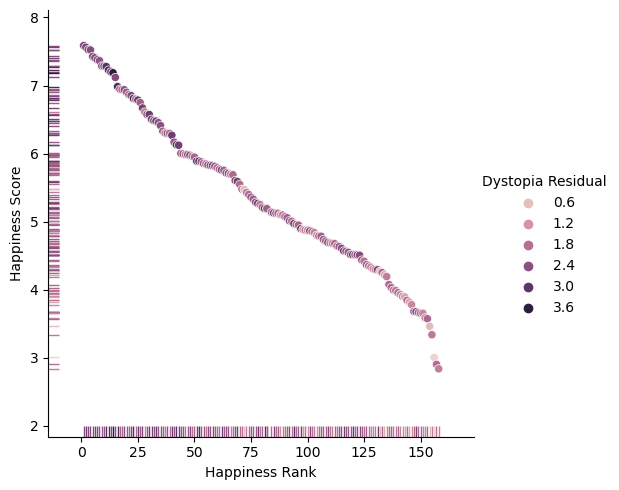

In [58]:
sns.relplot(data=df, x='Happiness Rank', y='Happiness Score', hue='Dystopia Residual')
sns.rugplot(data=df, x='Happiness Rank', y='Happiness Score', hue='Dystopia Residual', legend=False)

<Axes: xlabel='Happiness Rank', ylabel='Economy (GDP per Capita)'>

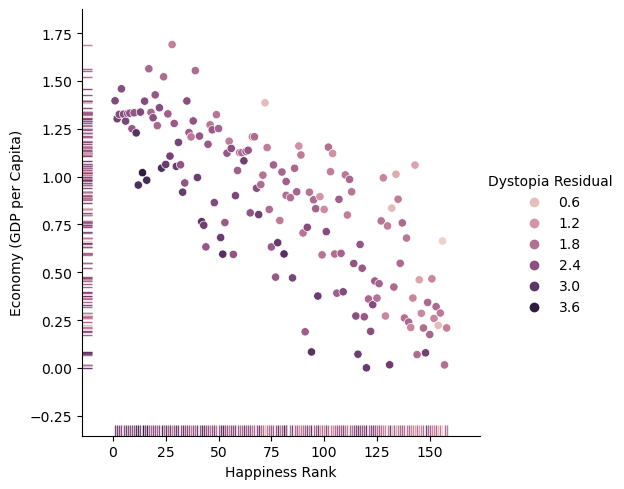

In [59]:
sns.relplot(data=df, x='Happiness Rank', y='Economy (GDP per Capita)', hue='Dystopia Residual')
sns.rugplot(data=df, x='Happiness Rank', y='Economy (GDP per Capita)', hue='Dystopia Residual', legend=False)

<Axes: xlabel='Health (Life Expectancy)', ylabel='Economy (GDP per Capita)'>

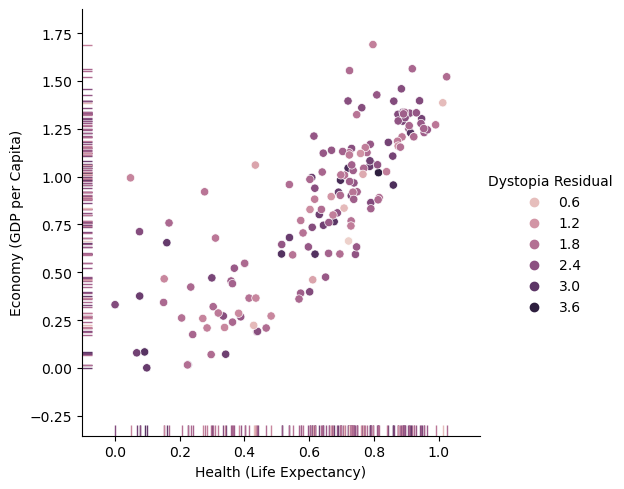

In [60]:
sns.relplot(data=df, x='Health (Life Expectancy)', y='Economy (GDP per Capita)', hue='Dystopia Residual')
sns.rugplot(data=df, x='Health (Life Expectancy)', y='Economy (GDP per Capita)', hue='Dystopia Residual', legend=False)

<Axes: xlabel='Health (Life Expectancy)', ylabel='Freedom'>

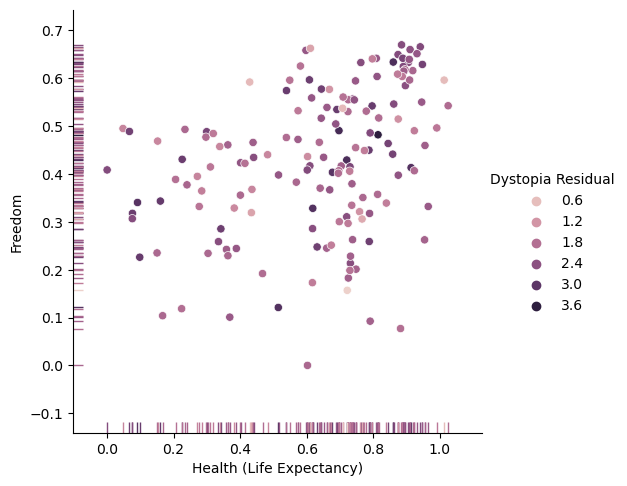

In [61]:
sns.relplot(data=df, x='Health (Life Expectancy)', y='Freedom', hue='Dystopia Residual')
sns.rugplot(data=df, x='Health (Life Expectancy)', y='Freedom', hue='Dystopia Residual', legend=False)

<Axes: xlabel='Trust (Government Corruption)', ylabel='Freedom'>

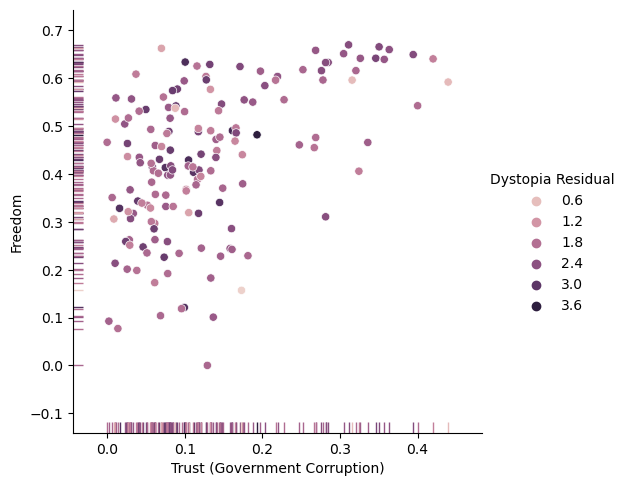

In [62]:
sns.relplot(data=df, x='Trust (Government Corruption)', y='Freedom', hue='Dystopia Residual')
sns.rugplot(data=df, x='Trust (Government Corruption)', y='Freedom', hue='Dystopia Residual', legend=False)

<Axes: xlabel='Family', ylabel='Generosity'>

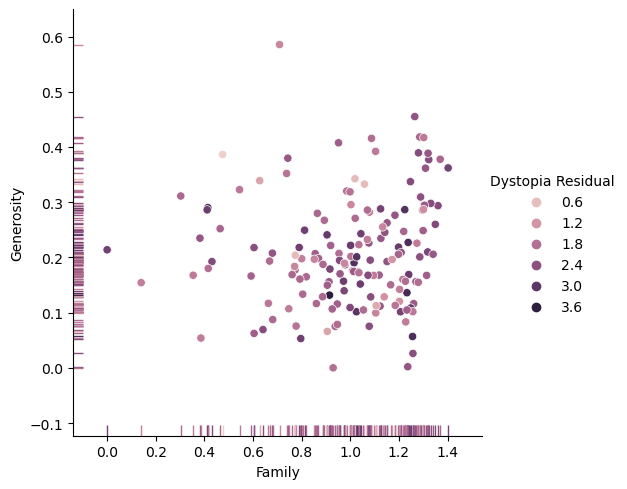

In [63]:
sns.relplot(data=df, x='Family', y='Generosity', hue='Dystopia Residual')
sns.rugplot(data=df, x='Family', y='Generosity', hue='Dystopia Residual', legend=False)

<Axes: xlabel='Standard Error', ylabel='Generosity'>

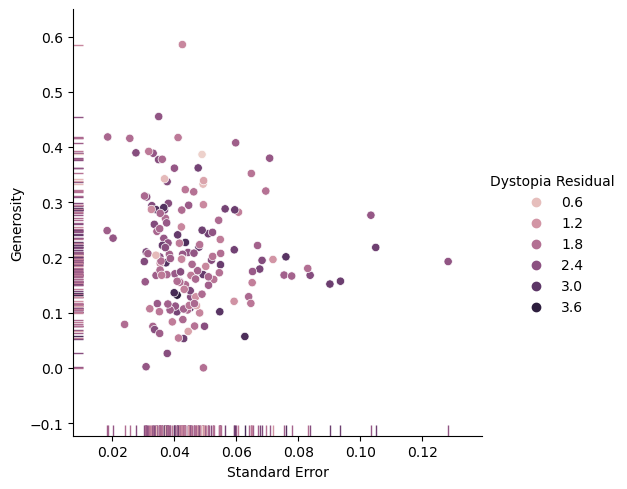

In [64]:
sns.relplot(data=df, x='Standard Error', y='Generosity', hue='Dystopia Residual')
sns.rugplot(data=df, x='Standard Error', y='Generosity', hue='Dystopia Residual', legend=False)

<Axes: xlabel='Standard Error', ylabel='Dystopia Residual'>

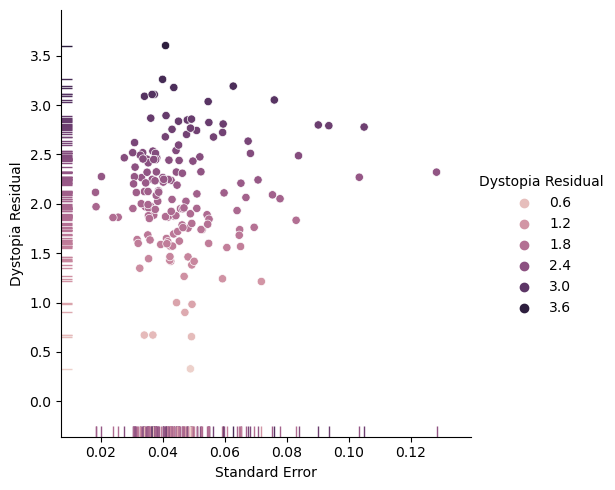

In [65]:
sns.relplot(data=df, x='Standard Error', y='Dystopia Residual', hue='Dystopia Residual')
sns.rugplot(data=df, x='Standard Error', y='Dystopia Residual', hue='Dystopia Residual', legend=False)

In [66]:
print(Columns_List)

['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


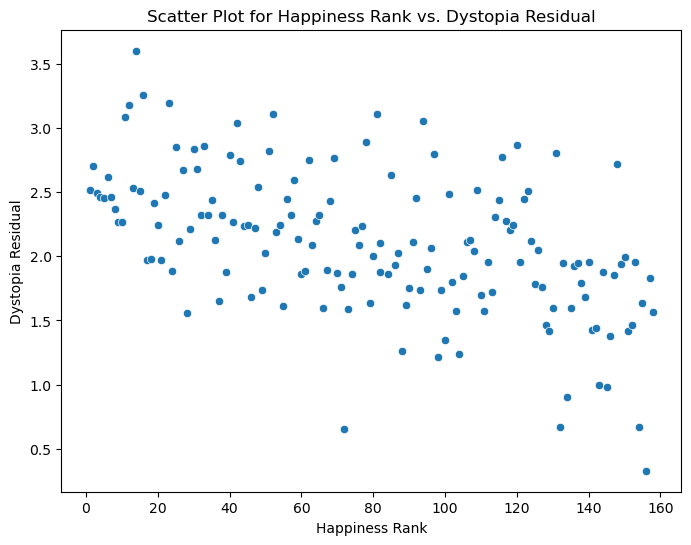

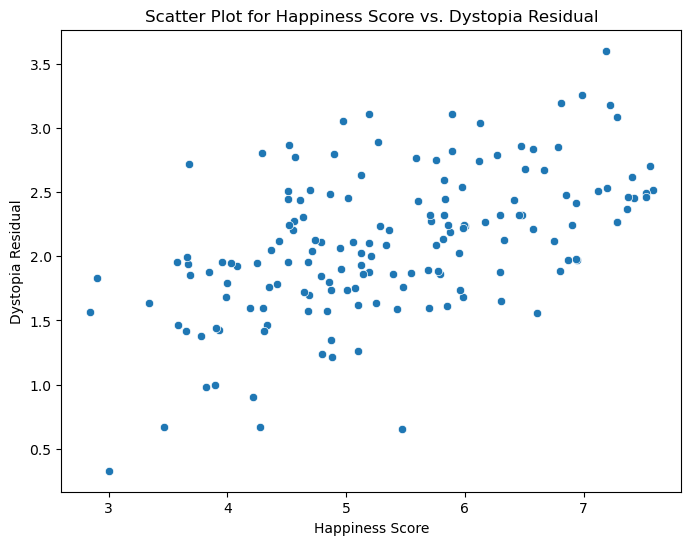

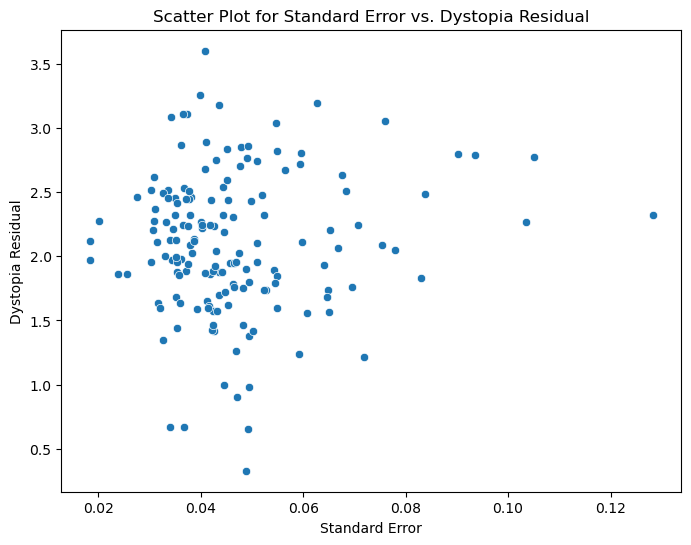

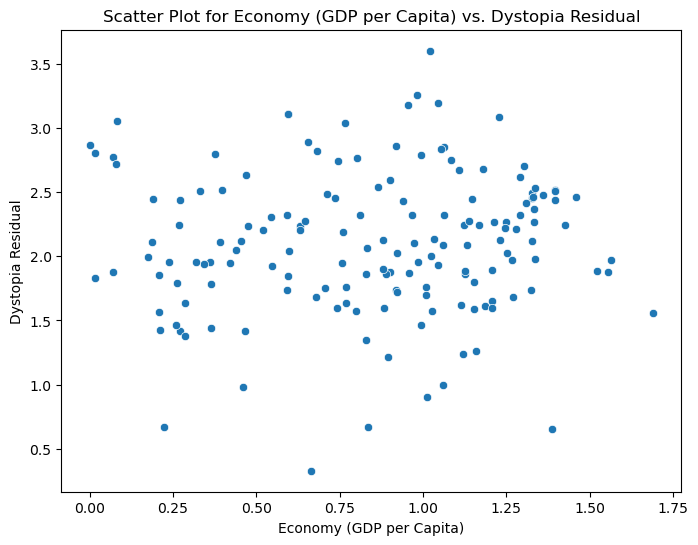

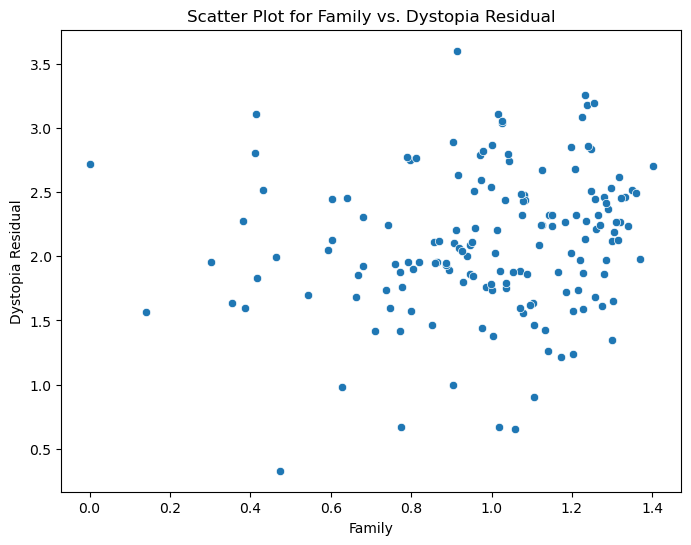

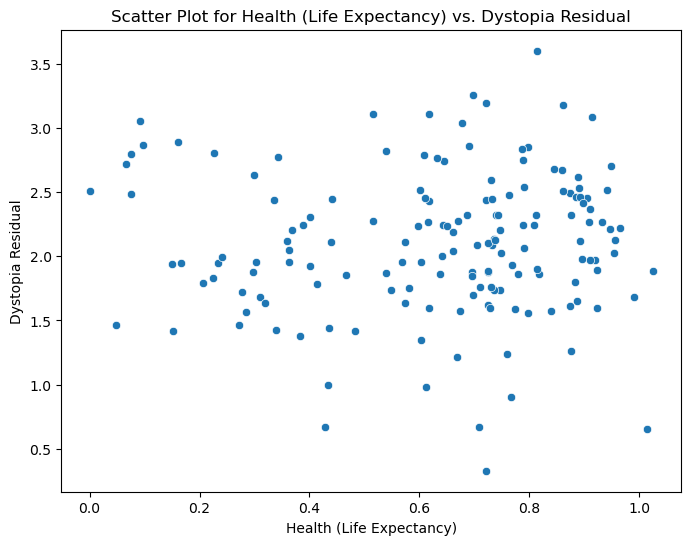

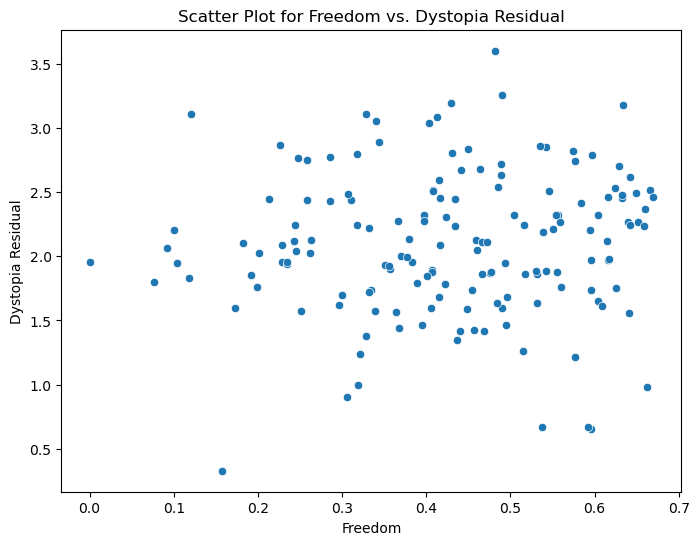

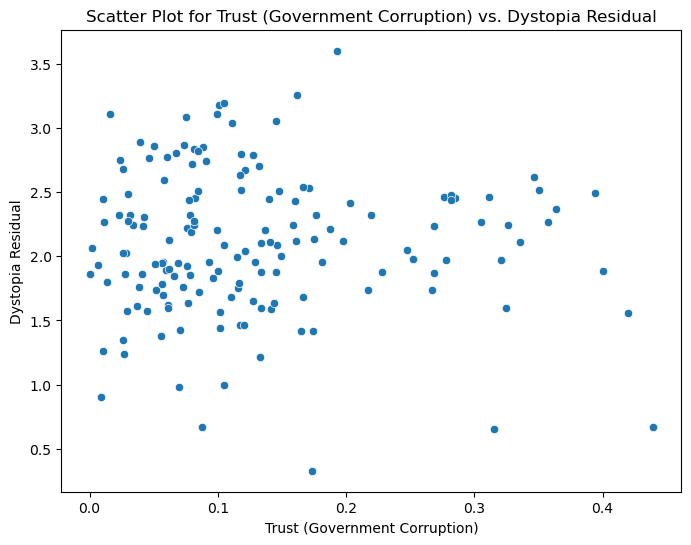

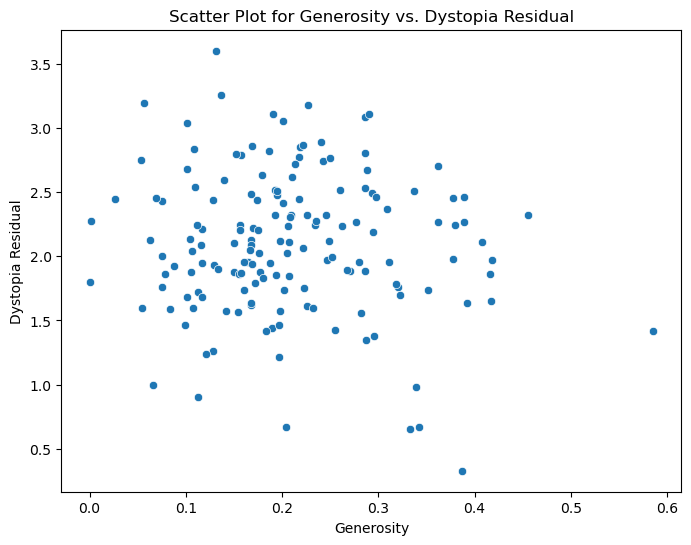

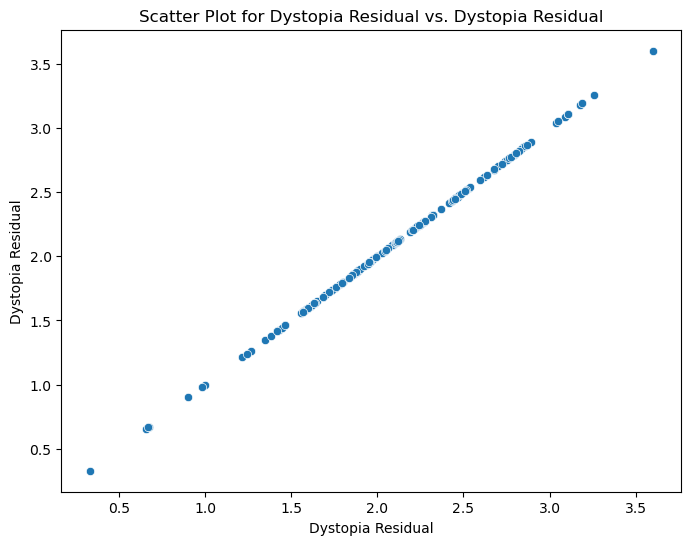

In [67]:
# Printing all scatter plots seperately for numerical columns
for col in Columns_List:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Dystopia Residual', data=df)  # We have 'Dystopia Residual' as a target column
    plt.title(f'Scatter Plot for {col} vs. Dystopia Residual')
    plt.show()